In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import lazypredict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score, recall_score, balanced_accuracy_score, precision_score, roc_curve, precision_recall_curve, matthews_corrcoef, auc
from sklearn.calibration import CalibratedClassifierCV

## Data Cleaning

In [ ]:
df = pd.read_csv("heart_2022_no_nans.csv")

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
STATES = {
   "Alabama" : 1 ,
   "Alaska" : 2,
   "Arizona" : 3,
   "Arkansas" : 4,
   "California" : 5,
   "Colorado" : 6,
   "Connecticut" : 7,
   "Delaware" : 8,
   "District of Columbia" : 9,
    "Florida" : 10,
    "Georgia" : 11,
    "Hawaii" : 12,
    "Idaho" : 13,
    "Illinois" : 14,
    "Indiana" : 15,
    "Iowa" : 16,
    "Kansas" : 17,
    "Kentucky" : 18,
    "Louisiana" : 19,
    "Maine" : 20,
    "Maryland" : 21,
    "Massachusetts" : 22,
    "Michigan" : 23,
    "Minnesota" : 24,
    "Mississippi" : 25,
    "Missouri" : 26,
    "Montana" : 27,
    "Nebraska" : 28,
    "Nevada" : 29,
    "New Hampshire" : 30,
    "New Jersey" : 31,
    "New Mexico" : 32,
    "New York" : 33,
    "North Carolina" : 34,
    "North Dakota" : 35,
    "Ohio" : 36,
    "Oklahoma" : 37,
    "Oregon" : 38,
    "Pennsylvania" : 39,
    "Rhode Island" : 40,
    "South Carolina" : 41,
    "South Dakota" : 42,
    "Tennessee" : 43,
    "Texas" : 44,
    "Utah" : 45,
    "Vermont" : 46,
    "Virginia" : 47,
    "Washington" : 48,
    "West Virginia" : 49,
    "Wisconsin" : 50,
    "Wyoming" : 51,
    "Guam" : 52,
    "Puerto Rico" : 53,
    "Virgin Islands" : 54,
}
df_copy = df.copy()
for i  in range(len(df["State"])):
       if df_copy["State"][i] in STATES:
           df_copy["State"][i] = STATES[df_copy["State"][i]]

heart_df = df_copy

In [ ]:
heart_df.head(250000)

In [ ]:
df_copy = heart_df.copy()
SEX = {
    'Male':1,
    'Female':2
}

GEN_HEALTH = {
    "Excellent":1,
    "Very good":2,
    "Good":3, 
    "Fair":4,
    "Poor":5
}

LAST_CHECKUP = {
    "Within past year (anytime less than 12 months ago)":1,
    "Within past 2 years (1 year but less than 2 years ago)":2,
    "Within past 5 years (2 years but less than 5 years ago)":3, 
    "5 or more years ago":4 
}
TEETH_REMOVED = {
    "1 to 5":1,
    "6 or more, but not all":2,
    "All":3,
    "None of them":4
}

DIABETES = {
    "Yes":1,
    "Yes, but only during pregnancy (female)":2,
    "No":3,
    "No, pre-diabetes or borderline diabetes":4
}

SMOKER_STATUS = {
    "Current smoker - now smokes every day":1, 
    "Current smoker - now smokes some days":2, 
    "Former smoker":3, 
    "Never smoked":4
}

ECIGARETTES = {
    "Never used e-cigarettes in my entire life":1,
    "Use them every day":2,
    "Use them some days":3,
    "Not at all (right now)":4
}

RACE = {
    "White only, Non-Hispanic":1,
    "Black only, Non-Hispanic":2,
    "Other race only, Non-Hispanic":3,
    "Multiracial, Non-Hispanic":4,
    "Hispanic":5,
}

AGE_CATEGORY = {
   "Age 18 to 24":1,
   "Age 25 to 29":2,
   "Age 30 to 34":3,
   "Age 35 to 39":4,
   "Age 40 to 44":5,
   "Age 45 to 49":6,
   "Age 50 to 54":7,
   "Age 55 to 59":8,
   "Age 60 to 64":9,
    "Age 65 to 69":10,
    "Age 70 to 74":11,
    "Age 75 to 79":12,
    "Age 80 or older":13
}

TETANUS = {
    "Yes, received Tdap":1,
    "Yes, received tetanus shot, but not Tdap":2,
    "Yes, received tetanus shot but not sure what type":3,
    "No, did not receive any tetanus shot in the past 10 years":4
}

COVID = {
    "Yes":1,
    "No":2,
    "Tested positive using home test without a health professional":3
}

for i  in range(len(df["State"])):
    df_copy["Sex"][i] = SEX[df_copy["Sex"][i]]
    df_copy["GeneralHealth"][i] = GEN_HEALTH[df_copy["GeneralHealth"][i]]
    df_copy["LastCheckupTime"][i] = LAST_CHECKUP[df_copy["LastCheckupTime"][i]]
    df_copy["RemovedTeeth"][i] = TEETH_REMOVED[df_copy["RemovedTeeth"][i]]
    df_copy["HadDiabetes"][i] = DIABETES[df_copy["HadDiabetes"][i]]
    df_copy["SmokerStatus"][i] = SMOKER_STATUS[df_copy["SmokerStatus"][i]]
    df_copy["ECigaretteUsage"][i] = ECIGARETTES[df_copy["ECigaretteUsage"][i]]
    df_copy["RaceEthnicityCategory"][i] = RACE[df_copy["RaceEthnicityCategory"][i]]
    df_copy["AgeCategory"][i] = AGE_CATEGORY[df_copy["AgeCategory"][i]]
    df_copy["TetanusLast10Tdap"][i] = TETANUS[df_copy["TetanusLast10Tdap"][i]]
    df_copy["CovidPos"][i] = COVID[df_copy["CovidPos"][i]]

heart_df = df_copy    

In [ ]:
heart_df.head()

In [ ]:
YES_NO_QUESTIONS = {'Yes':1,'No':2}

df_copy = heart_df.copy()

for i in range(len(df)):
    df_copy["PhysicalActivities"][i] = YES_NO_QUESTIONS[df_copy["PhysicalActivities"][i]]
    df_copy["HadAngina"][i] = YES_NO_QUESTIONS[df_copy["HadAngina"][i]]
    df_copy["HadStroke"][i] = YES_NO_QUESTIONS[df_copy["HadStroke"][i]]
    df_copy["HadAsthma"][i] = YES_NO_QUESTIONS[df_copy["HadAsthma"][i]]
    df_copy["HadSkinCancer"][i] = YES_NO_QUESTIONS[df_copy["HadSkinCancer"][i]]
    df_copy["HadCOPD"][i] = YES_NO_QUESTIONS[df_copy["HadCOPD"][i]]
    df_copy["HadDepressiveDisorder"][i] = YES_NO_QUESTIONS[df_copy["HadDepressiveDisorder"][i]]
    df_copy["HadKidneyDisease"][i] = YES_NO_QUESTIONS[df_copy["HadKidneyDisease"][i]]
    df_copy["HadArthritis"][i] = YES_NO_QUESTIONS[df_copy["HadArthritis"][i]]
    df_copy["DeafOrHardOfHearing"][i] = YES_NO_QUESTIONS[df_copy["DeafOrHardOfHearing"][i]]
    df_copy["BlindOrVisionDifficulty"][i] = YES_NO_QUESTIONS[df_copy["BlindOrVisionDifficulty"][i]]
    df_copy["DifficultyConcentrating"][i] = YES_NO_QUESTIONS[df_copy["DifficultyConcentrating"][i]]
    df_copy["DifficultyWalking"][i] = YES_NO_QUESTIONS[df_copy["DifficultyWalking"][i]]
    df_copy["DifficultyDressingBathing"][i] = YES_NO_QUESTIONS[df_copy["DifficultyDressingBathing"][i]]
    df_copy["DifficultyErrands"][i] = YES_NO_QUESTIONS[df_copy["DifficultyErrands"][i]]
    df_copy["ChestScan"][i] = YES_NO_QUESTIONS[df_copy["ChestScan"][i]]
    df_copy["AlcoholDrinkers"][i] = YES_NO_QUESTIONS[df_copy["AlcoholDrinkers"][i]]       
    df_copy["FluVaxLast12"][i] = YES_NO_QUESTIONS[df_copy["FluVaxLast12"][i]]
    df_copy["PneumoVaxEver"][i] = YES_NO_QUESTIONS[df_copy["PneumoVaxEver"][i]]
    df_copy["HighRiskLastYear"][i] = YES_NO_QUESTIONS[df_copy["HighRiskLastYear"][i]]

heart_df = df_copy    

In [ ]:
heart_df.head()

In [ ]:
df_copy = heart_df.copy()

for i in range(len(df["State"])):
        df_copy["HIVTesting"][i] = YES_NO_QUESTIONS[df_copy["HIVTesting"][i]]
heart_df = df_copy    


In [ ]:
heart_df.head()

In [ ]:
df_copy = heart_df.copy()

for i in range(len(df["State"])):
        df_copy["HadHeartAttack"][i] = YES_NO_QUESTIONS[df_copy["HadHeartAttack"][i]]
heart_df = df_copy 

In [ ]:
heart_df.head()

## Balance Data

In [69]:
# function to create classification reports
import seaborn as sns

def Generate_Model_Test_Classification_Report(model, X_test, y_test, model_name=""):

        '''
        Purpose:
            Generate the consolidated test classification report.
            A one-stop function to generate all the relevant model evaluation metrics.
            The report consists of the following classification results & metrics -
                1. Confusion Matrix
                2. Classification Report
                3. F1 Score
                4. Accuracy
                5. Mathews Correlation Coefficient (MCC)
                6. Precision
                7. Recall
                8. AUROC Score - Area Under the Receiver Operating Characteristic Curve
                9. AUC-PR Score - Area Under the Precision Recall Curve.
                10. AUROC Curve - Area Under the Receiver Operating Characteristic Curve
                11. AUC-PR Curve - Area Under the Precision Recall Curve.

        Parameters:
            1. y_test - The Ground Truth for each test image.
            2. y_pred - The Predicted label for each image.
            3. model_name - Model Name

        Return Value:
            NONE.
        '''

        y = 1.05
        # Report Title & Classification Mterics Abbreviations...
        fig, axes = plt.subplots(3, 1, figsize = (8, 3))
        axes[0].text(9, 1.8, "CONSOLIDATED MODEL TEST REPORT", fontsize=30, horizontalalignment='center',
                     color='DarkBlue', weight = 'bold')

        axes[0].axis([0, 10, 0, 10])
        axes[0].axis('off')

        axes[1].text(9, 4, "Model Name: " + model_name, style='italic',
                             fontsize=18, horizontalalignment='center', color='DarkOrange', weight = 'bold')

        axes[1].axis([0, 10, 0, 10])
        axes[1].axis('off')

        axes[2].text(0, 4, "* 1 - Had Heart Attack\t\t\t\t\t\t\t * 0 - Did not have Heart Attack\n".expandtabs() +
                     "* MCC - Matthews Correlation Coefficient\t\t* AUC - Area Under The Curve\n".expandtabs() +
                     "* ROC - Receiver Operating Characteristics     " +
                     "\t* AUROC - Area Under the Receiver Operating    Characteristics".expandtabs(),
                     style='italic', fontsize=10, horizontalalignment='left', color='orangered')

        axes[2].axis([0, 10, 0, 10])
        axes[2].axis('off')

        scores = []
        metrics = ['F1       ', 'MCC      ', 'Precision', 'Recall   ', 'Accuracy ',
                   'AUC_ROC  ', 'AUC_PR   ']

        # Plot ROC and PR curves using all models and test data...
        y_pred = model.predict(X_test)
        y_pred_probs = model.predict_proba(X_test)[:, 1:]

        fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred)
        precision, recall, th = precision_recall_curve(y_test.values.ravel(), y_pred_probs)

        # Calculate the individual classification metic scores...
        model_f1_score = f1_score(y_test, y_pred)
        model_matthews_corrcoef_score = matthews_corrcoef(y_test, y_pred)
        model_precision_score = precision_score(y_test, y_pred)
        model_recall_score = recall_score(y_test, y_pred)
        model_accuracy_score = accuracy_score(y_test, y_pred)
        model_auc_roc = auc(fpr, tpr)
        model_auc_pr = auc(recall, precision)

        scores.append([model_f1_score,
                       model_matthews_corrcoef_score,
                       model_precision_score,
                       model_recall_score,
                       model_accuracy_score,
                       model_auc_roc,
                       model_auc_pr])

        sampling_results = pd.DataFrame(columns = ['Classification Metric', 'Score Value'])
        for i in range(len(scores[0])):
            sampling_results.loc[i] = [metrics[i], scores[0][i]]

        sampling_results.index = np.arange(1, len(sampling_results) + 1)

        class_report = classification_report(y_test, y_pred)
        conf_matx = confusion_matrix(y_test, y_pred)

        # Display the Confusion Matrix...
        fig, axes = plt.subplots(1, 3, figsize = (20, 4))
        sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes[0])
        axes[0].set_title("1. Confusion Matrix", fontsize=21, color='darkgreen', weight = 'bold',
                          style='italic', loc='left', y=y)

        # Classification Metrics
        axes[1].text(5, 1.8, sampling_results.to_string(float_format='{:,.4f}'.format, index=False), style='italic',
                     fontsize=20, horizontalalignment='center')
        axes[1].axis([0, 10, 0, 10])
        axes[1].axis('off')
        axes[1].set_title("2. Classification Metrics", fontsize=20, color='darkgreen', weight = 'bold',
                          style='italic', loc='center', y=y)

        # Classification Report
        axes[2].text(0, 1, class_report, style='italic', fontsize=20)
        axes[2].axis([0, 10, 0, 10])
        axes[2].axis('off')
        axes[2].set_title("3. Classification Report", fontsize=20, color='darkgreen', weight = 'bold',
                          style='italic', loc='center', y=y)

        plt.tight_layout()
        plt.show()

        # AUC-ROC & Precision-Recall Curve
        fig, axes = plt.subplots(1, 2, figsize = (14, 4))

        axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
        axes[1].plot(recall, precision, label = f"auc_pr = {model_auc_pr:.3f}")

        axes[0].plot([0, 1], [0, 1], 'k--')
        axes[0].legend(loc = "lower right")
        axes[0].set_xlabel("False Positive Rate")
        axes[0].set_ylabel("True Positive Rate")
        axes[0].set_title("4. AUC - ROC Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold',
                          style='italic', loc='center', pad=1, y=y)

        axes[1].legend(loc = "lower left")
        axes[1].set_xlabel("Recall")
        axes[1].set_ylabel("Precision")
        axes[1].set_title("5. Precision - Recall Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold',
                          style='italic', loc='center', pad=3, y=y)

        plt.subplots_adjust(top=0.95)
        plt.tight_layout()
        plt.show()

        return scores

In [70]:
data= heart_df

In [71]:
data.shape

(246022, 40)

In [72]:
data.head()

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0      1    2              2                 4.0               0.0   
1      1    1              2                 0.0               0.0   
2      1    1              2                 0.0               0.0   
3      1    2              4                 5.0               0.0   
4      1    2              3                 3.0              15.0   

   LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
0                1                   1         9.0             4   
1                1                   1         6.0             4   
2                1                   2         8.0             2   
3                1                   1         9.0             4   
4                1                   1         5.0             1   

   HadHeartAttack  ...  HeightInMeters  WeightInKilograms    BMI  \
0               2  ...            1.60              71.67  27.99   
1               2  ...            1.78              95.25  30.13   
2               2  ...            1.85             108.86  31.66   
3               2  ...            1.70              90.72  31.32   
4               2  ...            1.55              79.38  33.07   

   AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
0                2           2             1              1   
1                2           2             1              1   
2                1           2             2              1   
3                2           2             1              1   
4                2           2             1              1   

   TetanusLast10Tdap  HighRiskLastYear  CovidPos  
0                  1                 2         2  
1                  3                 2         2  
2                  4                 2         1  
3                  4                 2         1  
4                  4                 2         2  

[5 rows x 40 columns]

In [73]:
data['HadHeartAttack'].replace(to_replace={1:1, 2:0}, inplace=True)

In [74]:
data.head()

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0      1    2              2                 4.0               0.0   
1      1    1              2                 0.0               0.0   
2      1    1              2                 0.0               0.0   
3      1    2              4                 5.0               0.0   
4      1    2              3                 3.0              15.0   

   LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
0                1                   1         9.0             4   
1                1                   1         6.0             4   
2                1                   2         8.0             2   
3                1                   1         9.0             4   
4                1                   1         5.0             1   

   HadHeartAttack  ...  HeightInMeters  WeightInKilograms    BMI  \
0               0  ...            1.60              71.67  27.99   
1               0  ...            1.78              95.25  30.13   
2               0  ...            1.85             108.86  31.66   
3               0  ...            1.70              90.72  31.32   
4               0  ...            1.55              79.38  33.07   

   AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
0                2           2             1              1   
1                2           2             1              1   
2                1           2             2              1   
3                2           2             1              1   
4                2           2             1              1   

   TetanusLast10Tdap  HighRiskLastYear  CovidPos  
0                  1                 2         2  
1                  3                 2         2  
2                  4                 2         1  
3                  4                 2         1  
4                  4                 2         2  

[5 rows x 40 columns]

In [75]:
data.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [76]:
data.shape

(246022, 40)

In [77]:
data['HadHeartAttack'].value_counts()

0    232587
1     13435
Name: HadHeartAttack, dtype: int64

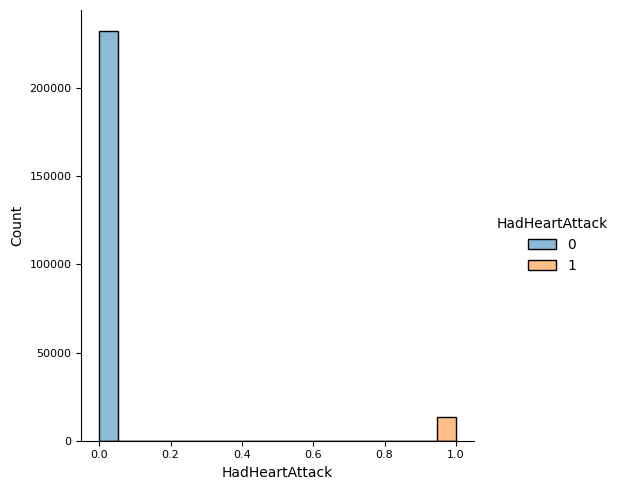

In [78]:
sn.displot(data, x="HadHeartAttack", hue='HadHeartAttack')

In [79]:
no_ha = data.loc[data['HadHeartAttack'] == 0].sample(n = 13435, random_state=33)
ha = data.loc[data['HadHeartAttack'] == 1]
frames = [ha,no_ha]
data = pd.concat(frames)

In [80]:
sn.displot(data, x="HadHeartAttack", hue='HadHeartAttack')

In [81]:
data.shape

(26870, 40)

In [82]:
data['HadHeartAttack'].value_counts()

1    13435
0    13435
Name: HadHeartAttack, dtype: int64

In [83]:
data

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
7           1    1              4                 5.0               0.0   
12          1    1              3                 5.0               0.0   
34          1    1              3                 0.0               0.0   
37          1    1              3                 3.0              27.0   
43          1    1              3                 0.0               0.0   
...       ...  ...            ...                 ...               ...   
93521      21    2              3                 0.0               1.0   
191893     44    1              3                 0.0               0.0   
203133     45    1              3                 0.0               0.0   
187853     43    1              2                 0.0               0.0   
25093       7    2              1                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
7                     1                   1         8.0             1   
12                    1                   1         5.0             2   
34                    1                   1         6.0             1   
37                    1                   1         5.0             2   
43                    1                   1         8.0             1   
...                 ...                 ...         ...           ...   
93521                 1                   2         6.0             4   
191893                1                   1         8.0             4   
203133                1                   1         7.0             4   
187853                1                   2         6.0             4   
25093                 1                   1         7.0             1   

        HadHeartAttack  ...  HeightInMeters  WeightInKilograms    BMI  \
7                    1  ...            1.75              74.84  24.37   
12                   1  ...            1.88             115.67  32.74   
34                   1  ...            1.78              71.67  22.67   
37                   1  ...            1.85             123.83  36.02   
43                   1  ...            1.78              95.25  30.13   
...                ...  ...             ...                ...    ...   
93521                0  ...            1.68              83.01  29.54   
191893               0  ...            1.88              90.72  25.68   
203133               0  ...            1.65              68.04  24.96   
187853               0  ...            1.68              63.50  22.60   
25093                0  ...            1.65              52.16  19.14   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
7                     2           1             1              1   
12                    2           2             1              1   
34                    2           2             1              1   
37                    2           2             1              2   
43                    2           1             1              1   
...                 ...         ...           ...            ...   
93521                 1           2             1              1   
191893                1           2             1              1   
203133                1           2             1              2   
187853                2           1             2              2   
25093                 1           2             2              2   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
7                       4                 2         1  
12                      3                 2         2  
34                      1                 2         2  
37                      3                 2         1  
43                      3                 2         2  
...                   ...               ...       ...  
93521                   3                 2         3  
191893                  3                 2         1  
203133                  4       

In [84]:
N=13435*2
data=data.sample(n = N, random_state=33)

In [85]:
data['HadHeartAttack'].value_counts()

0    13435
1    13435
Name: HadHeartAttack, dtype: int64

In [86]:
data[0:10]

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
57747      15    1              1                 5.0               0.0   
194270     44    2              3                 0.0               0.0   
134406     30    1              1                 0.0               0.0   
23565       6    1              3                 4.0               2.0   
79090      19    2              5                30.0              30.0   
130703     29    2              2                 0.0               0.0   
89856      21    2              2                 3.0               2.0   
105886     24    1              3                 0.0               1.0   
91995      21    1              3                 0.0               1.0   
207916     46    1              3                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
57747                 3                   1         6.0             1   
194270                1                   1         9.0             4   
134406                1                   1         7.0             1   
23565                 3                   1         7.0             4   
79090                 1                   2         4.0             1   
130703                1                   1        10.0             1   
89856                 1                   1         8.0             4   
105886                1                   2         6.0             1   
91995                 1                   1         8.0             4   
207916                1                   1         9.0             4   

        HadHeartAttack  ...  HeightInMeters  WeightInKilograms    BMI  \
57747                0  ...            1.78              90.72  28.70   
194270               0  ...            1.55             111.13  46.29   
134406               0  ...            1.70              74.84  25.84   
23565                0  ...            1.80              77.11  23.80   
79090                0  ...            1.57              72.57  29.26   
130703               1  ...            1.68              74.84  26.63   
89856                0  ...            1.57             113.40  45.73   
105886               1  ...            1.75              79.38  25.84   
91995                1  ...            1.78             117.93  37.31   
207916               1  ...            1.80              88.45  27.20   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
57747                 1           1             2              2   
194270                2           1             1              2   
134406                2           2             1              2   
23565                 1           2             1              2   
79090                 2           1             2              1   
130703                1           2             1              1   
89856                 2           1             1              1   
105886                1           1             1              1   
91995                 2           1             1              1   
207916                1           2             1              2   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
57747                   1                 1         1  
194270                  4                 2         2  
134406                  4                 2         2  
23565                   3                 2         2  
79090                   3                 2         1  
130703                  4                 2         2  
89856                   1                 2         1  
105886                  4                 2         2  
91995                   1                 2         3  
207916                  3                 2         2  

[10 rows x 40 columns]

## Heatmap

C:\Users\alexg\AppData\Local\Temp\ipykernel_10728\2449102213.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


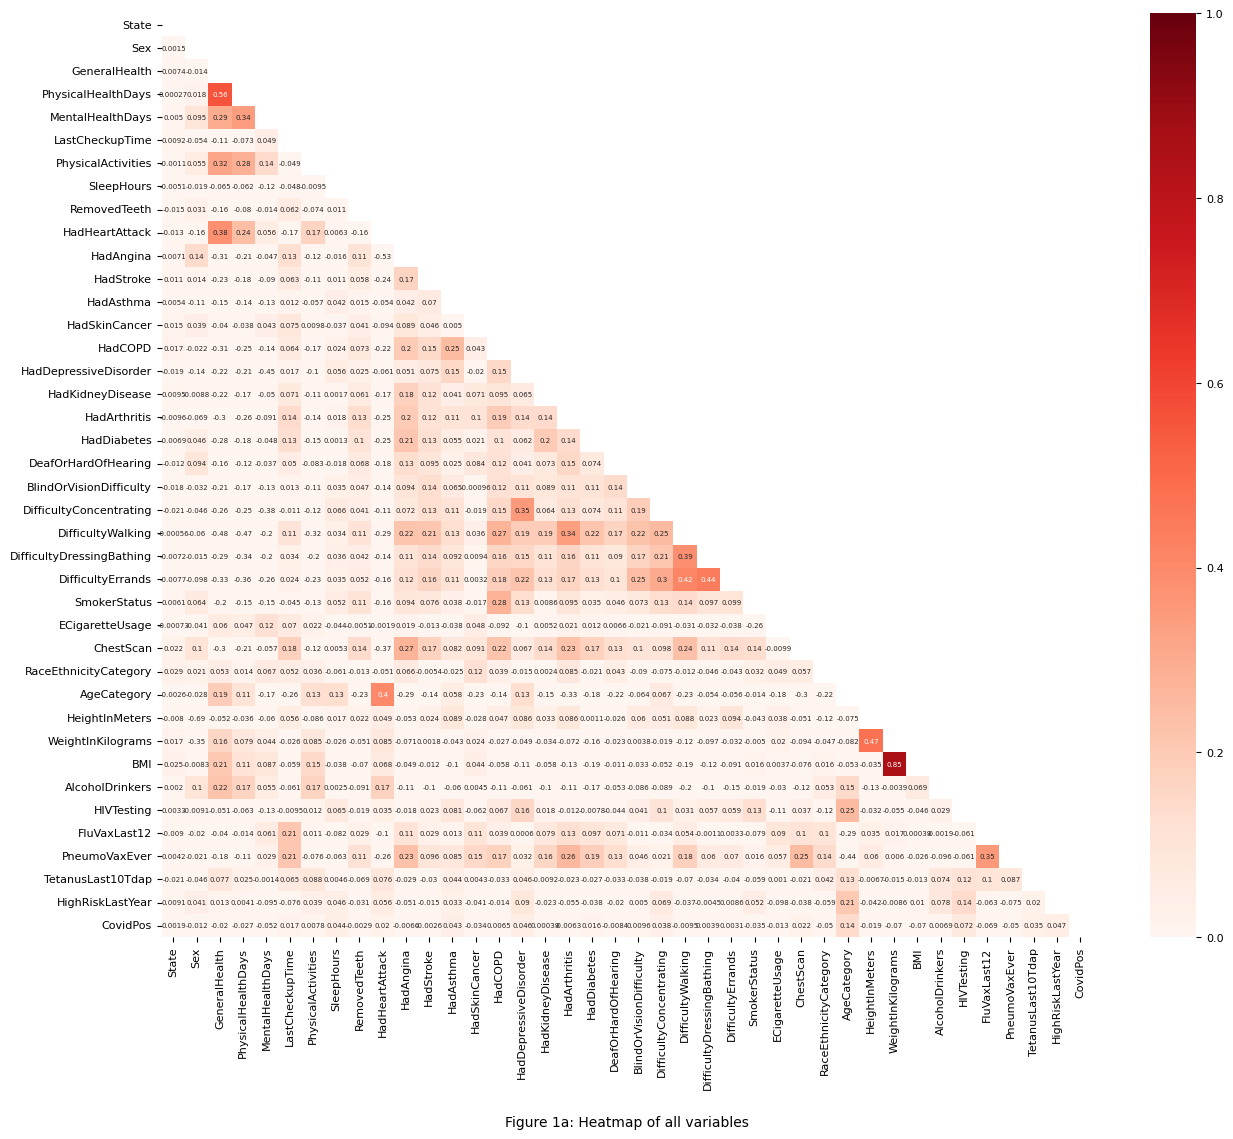

In [87]:
plt.rc('xtick', labelsize=8)   # fontsize of the tick labels
plt.rc('ytick', labelsize=8)  # fontsize of the tick labels
plt.figure(figsize=(15, 12))

plt.annotate('Figure 1a: Heatmap of all variables',
            xy = (0.5, -0.2),
            xycoords='axes fraction',
            ha='center',
            va="center",
            fontsize=10)

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sn.heatmap(data.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='Reds', annot_kws={"size": 5})

In [88]:
data['HadHeartAttack'].value_counts()

0    13435
1    13435
Name: HadHeartAttack, dtype: int64

## Split Data into Test, Train, Validate

In [89]:
data.shape

(26870, 40)

In [90]:
print(26870*.7)
print(26870*.2)
print(26870*.1)

18809.0
5374.0
2687.0


In [91]:
x_train=data[0:18809]
y_train= x_train.iloc[:,9]
x_train=x_train.loc[:, data.columns!='HadHeartAttack']

x_test=data[18809:24183]
y_test= x_test.iloc[:,9]
x_test=x_test.loc[:, data.columns!='HadHeartAttack']

x_val=data[24183:26870]
y_val= x_val.iloc[:,9]
x_val=x_val.loc[:, data.columns!='HadHeartAttack']

In [92]:
x_train

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
57747      15    1              1                 5.0               0.0   
194270     44    2              3                 0.0               0.0   
134406     30    1              1                 0.0               0.0   
23565       6    1              3                 4.0               2.0   
79090      19    2              5                30.0              30.0   
...       ...  ...            ...                 ...               ...   
79017      19    1              4                12.0               0.0   
71956      17    2              4                 0.0              15.0   
162498     36    2              3                14.0               0.0   
240221     52    1              2                 0.0               0.0   
103484     23    1              4                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
57747                 3                   1         6.0             1   
194270                1                   1         9.0             4   
134406                1                   1         7.0             1   
23565                 3                   1         7.0             4   
79090                 1                   2         4.0             1   
...                 ...                 ...         ...           ...   
79017                 2                   1         9.0             2   
71956                 1                   2         5.0             1   
162498                2                   2         5.0             3   
240221                1                   1         6.0             1   
103484                1                   1         5.0             1   

        HadAngina  ...  HeightInMeters  WeightInKilograms    BMI  \
57747           2  ...            1.78              90.72  28.70   
194270          2  ...            1.55             111.13  46.29   
134406          2  ...            1.70              74.84  25.84   
23565           1  ...            1.80              77.11  23.80   
79090           2  ...            1.57              72.57  29.26   
...           ...  ...             ...                ...    ...   
79017           1  ...            1.70              83.46  28.82   
71956           2  ...            1.63              90.72  34.33   
162498          2  ...            1.68              71.67  25.50   
240221          1  ...            1.78              83.91  26.54   
103484          2  ...            1.65              77.11  28.29   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
57747                 1           1             2              2   
194270                2           1             1              2   
134406                2           2             1              2   
23565                 1           2             1              2   
79090                 2           1             2              1   
...                 ...         ...           ...            ...   
79017                 2           2             2              2   
71956                 1           1             2              2   
162498                2           1             2              1   
240221                1           1             1              1   
103484                2           1             2              2   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
57747                   1                 1         1  
194270                  4                 2         2  
134406                  4                 2         2  
23565                   3                 2         2  
79090                   3                 2         1  
...                   ...               ...       ...  
79017                   3                 2         1  
71956                   4                 1         1  
162498                  3                 2         2  
240221                  1           

In [93]:
x_test

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
42673      11    2              5                30.0               3.0   
240161     52    2              5                30.0               0.0   
126186     28    1              3                 0.0               0.0   
86686      21    2              1                 0.0               0.0   
76530      19    2              2                 0.0               0.0   
...       ...  ...            ...                 ...               ...   
168369     37    2              5                30.0              10.0   
30168       8    2              4                 3.0               2.0   
71334      17    1              2                 0.0               0.0   
222407     48    1              2                 0.0               0.0   
28573       7    2              1                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
42673                 1                   1        10.0             1   
240161                2                   1        10.0             4   
126186                1                   1         8.0             1   
86686                 1                   1         5.0             1   
76530                 1                   1         6.0             4   
...                 ...                 ...         ...           ...   
168369                1                   2         7.0             1   
30168                 1                   1         6.0             2   
71334                 1                   1         7.0             4   
222407                1                   1         9.0             4   
28573                 1                   1         9.0             4   

        HadAngina  ...  HeightInMeters  WeightInKilograms    BMI  \
42673           2  ...            1.57              58.97  23.78   
240161          1  ...            1.47              56.70  26.12   
126186          2  ...            1.73              74.84  25.09   
86686           1  ...            1.50              58.06  25.85   
76530           2  ...            1.75             103.42  33.67   
...           ...  ...             ...                ...    ...   
168369          2  ...            1.63              77.56  29.35   
30168           1  ...            1.63              62.60  23.69   
71334           1  ...            1.96              81.65  21.34   
222407          2  ...            1.91             133.81  36.87   
28573           2  ...            1.63             104.33  39.48   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
42673                 2           2             2              1   
240161                2           2             1              1   
126186                1           2             1              2   
86686                 1           2             2              1   
76530                 2           2             1              2   
...                 ...         ...           ...            ...   
168369                1           2             1              1   
30168                 2           2             1              1   
71334                 2           2             1              2   
222407                2           1             1              1   
28573                 1           2             2              1   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
42673                   4                 2         2  
240161                  3                 2         1  
126186                  4                 2         2  
86686                   3                 2         2  
76530                   4                 2         2  
...                   ...               ...       ...  
168369                  4                 2         2  
30168                   4                 2         2  
71334                   1                 2         1  
222407                  3           

In [94]:
x_val

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
179148     41    1              4                 0.0               0.0   
7           1    1              4                 5.0               0.0   
138290     31    2              1                 0.0               0.0   
237949     51    1              1                 0.0               0.0   
178382     41    1              1                 0.0               0.0   
...       ...  ...            ...                 ...               ...   
788         1    1              3                 0.0               0.0   
9513        3    1              4                20.0               0.0   
105895     24    1              4                 0.0               0.0   
42268      11    2              4                 3.0              30.0   
55208      14    2              2                 0.0               2.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
179148                2                   2         6.0             1   
7                     1                   1         8.0             1   
138290                1                   1         7.0             1   
237949                1                   1         9.0             1   
178382                1                   1         6.0             3   
...                 ...                 ...         ...           ...   
788                   1                   1         7.0             2   
9513                  1                   1         6.0             1   
105895                1                   2         9.0             3   
42268                 1                   2         8.0             2   
55208                 1                   1         7.0             4   

        HadAngina  ...  HeightInMeters  WeightInKilograms    BMI  \
179148          1  ...            1.73             127.01  42.57   
7               1  ...            1.75              74.84  24.37   
138290          2  ...            1.65              67.13  24.63   
237949          2  ...            1.68              63.50  22.60   
178382          2  ...            1.83              81.65  24.41   
...           ...  ...             ...                ...    ...   
788             2  ...            1.75              80.74  26.29   
9513            2  ...            1.55              54.43  22.67   
105895          1  ...            1.70             104.33  36.02   
42268           1  ...            1.63              65.77  24.89   
55208           2  ...            1.55              68.04  28.34   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
179148                2           2             1              1   
7                     2           1             1              1   
138290                1           2             1              1   
237949                2           2             1              2   
178382                2           2             1              1   
...                 ...         ...           ...            ...   
788                   1           1             1              1   
9513                  1           2             2              1   
105895                2           2             1              1   
42268                 2           2             1              2   
55208                 2           2             2              1   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
179148                  1                 2         2  
7                       4                 2         1  
138290                  3                 2         2  
237949                  4                 2         1  
178382                  1                 2         2  
...                   ...               ...       ...  
788                     1                 2         2  
9513                    4                 2         2  
105895                  3                 2         2  
42268                   4           

## ANOVA F-Test

In [95]:
x_train_anova=x_train
x_test_anova=x_test
y_train_anova=y_train
y_test_anova=y_test
x_val_anova=x_val
y_val_anova=y_val

In [96]:
y_train_anova

57747     0
194270    0
134406    0
23565     0
79090     0
         ..
79017     1
71956     0
162498    1
240221    1
103484    0
Name: HadHeartAttack, Length: 18809, dtype: int64

In [97]:
anovaFTest=SelectKBest(score_func=f_classif, k=10)
anovaFTest.fit(x_train_anova, y_train_anova)
anovaFTest.transform(x_train_anova).shape

(18809, 10)

In [98]:
#anovaFTest.transform(x_train_anova)

In [99]:
x_train_anova

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
57747      15    1              1                 5.0               0.0   
194270     44    2              3                 0.0               0.0   
134406     30    1              1                 0.0               0.0   
23565       6    1              3                 4.0               2.0   
79090      19    2              5                30.0              30.0   
...       ...  ...            ...                 ...               ...   
79017      19    1              4                12.0               0.0   
71956      17    2              4                 0.0              15.0   
162498     36    2              3                14.0               0.0   
240221     52    1              2                 0.0               0.0   
103484     23    1              4                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
57747                 3                   1         6.0             1   
194270                1                   1         9.0             4   
134406                1                   1         7.0             1   
23565                 3                   1         7.0             4   
79090                 1                   2         4.0             1   
...                 ...                 ...         ...           ...   
79017                 2                   1         9.0             2   
71956                 1                   2         5.0             1   
162498                2                   2         5.0             3   
240221                1                   1         6.0             1   
103484                1                   1         5.0             1   

        HadAngina  ...  HeightInMeters  WeightInKilograms    BMI  \
57747           2  ...            1.78              90.72  28.70   
194270          2  ...            1.55             111.13  46.29   
134406          2  ...            1.70              74.84  25.84   
23565           1  ...            1.80              77.11  23.80   
79090           2  ...            1.57              72.57  29.26   
...           ...  ...             ...                ...    ...   
79017           1  ...            1.70              83.46  28.82   
71956           2  ...            1.63              90.72  34.33   
162498          2  ...            1.68              71.67  25.50   
240221          1  ...            1.78              83.91  26.54   
103484          2  ...            1.65              77.11  28.29   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
57747                 1           1             2              2   
194270                2           1             1              2   
134406                2           2             1              2   
23565                 1           2             1              2   
79090                 2           1             2              1   
...                 ...         ...           ...            ...   
79017                 2           2             2              2   
71956                 1           1             2              2   
162498                2           1             2              1   
240221                1           1             1              1   
103484                2           1             2              2   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
57747                   1                 1         1  
194270                  4                 2         2  
134406                  4                 2         2  
23565                   3                 2         2  
79090                   3                 2         1  
...                   ...               ...       ...  
79017                   3                 2         1  
71956                   4                 1         1  
162498                  3                 2         2  
240221                  1           

In [100]:
x_test_anova.shape

(5374, 39)

In [101]:
a=anovaFTest.get_support().tolist()
b=x_train_anova.columns.tolist()
selectedVars=[]
i=0

while i < len(a):
    if a[i]==True:
        selectedVars.append(b[i])
    i=i+1

In [102]:
selectedVars

['GeneralHealth',
 'PhysicalHealthDays',
 'HadAngina',
 'HadStroke',
 'HadArthritis',
 'HadDiabetes',
 'DifficultyWalking',
 'ChestScan',
 'AgeCategory',
 'PneumoVaxEver']

In [103]:
x_train_anova=x_train_anova[selectedVars]
x_test_anova=x_test_anova[selectedVars]

x_val_anova=x_val_anova[selectedVars]
x_val_anova=x_val_anova[selectedVars]

In [104]:
x_train_anova

GeneralHealth  PhysicalHealthDays  HadAngina  HadStroke  HadArthritis  \
57747               1                 5.0          2          2             2   
194270              3                 0.0          2          2             2   
134406              1                 0.0          2          2             2   
23565               3                 4.0          1          2             2   
79090               5                30.0          2          2             1   
...               ...                 ...        ...        ...           ...   
79017               4                12.0          1          2             2   
71956               4                 0.0          2          2             1   
162498              3                14.0          2          1             2   
240221              2                 0.0          1          2             1   
103484              4                 0.0          2          2             2   

        HadDiabetes  DifficultyWalking  ChestScan  AgeCategory  PneumoVaxEver  
57747             3                  2          1            8              2  
194270            3                  2          2            4              2  
134406            3                  2          2           10              2  
23565             3                  2          1            5              2  
79090             3                  1          1            7              1  
...             ...                ...        ...          ...            ...  
79017             3                  2          2           11              2  
71956             3                  1          1            3              2  
162498            4                  1          1            9              1  
240221            1                  2          1            8              1  
103484            3                  2          2            4              2  

[18809 rows x 10 columns]

In [105]:
x_test_anova

GeneralHealth  PhysicalHealthDays  HadAngina  HadStroke  HadArthritis  \
42673               5                30.0          2          2             2   
240161              5                30.0          1          2             1   
126186              3                 0.0          2          2             1   
86686               1                 0.0          1          1             2   
76530               2                 0.0          2          2             2   
...               ...                 ...        ...        ...           ...   
168369              5                30.0          2          2             1   
30168               4                 3.0          1          2             2   
71334               2                 0.0          1          2             2   
222407              2                 0.0          2          2             2   
28573               1                 0.0          2          2             1   

        HadDiabetes  DifficultyWalking  ChestScan  AgeCategory  PneumoVaxEver  
42673             1                  2          1           12              1  
240161            1                  1          1            9              1  
126186            3                  2          2           12              2  
86686             3                  2          2           12              1  
76530             3                  2          1            9              2  
...             ...                ...        ...          ...            ...  
168369            3                  2          1            9              1  
30168             2                  2          1           13              1  
71334             3                  2          2           10              2  
222407            1                  2          2            9              1  
28573             3                  2          1            6              1  

[5374 rows x 10 columns]

In [106]:
pModel=CalibratedClassifierCV(Perceptron())
pModel=pModel.fit(x_train_anova, y_train_anova)
pResults=pModel.predict(x_test_anova)

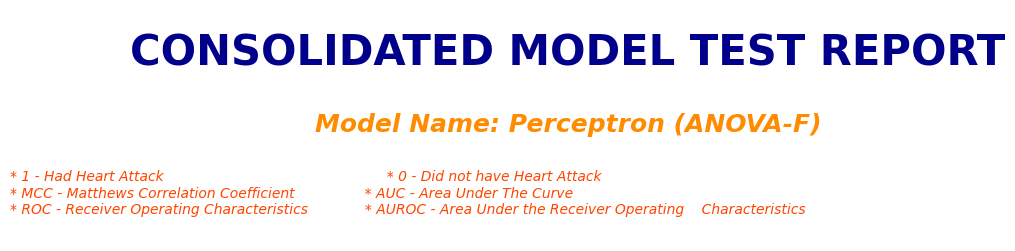

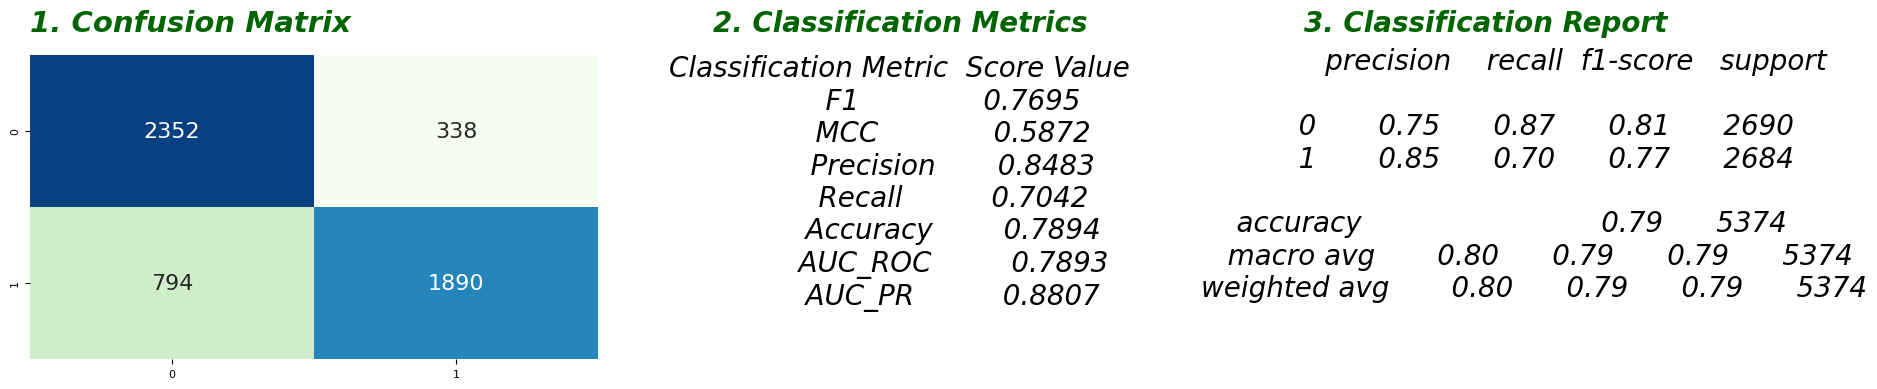

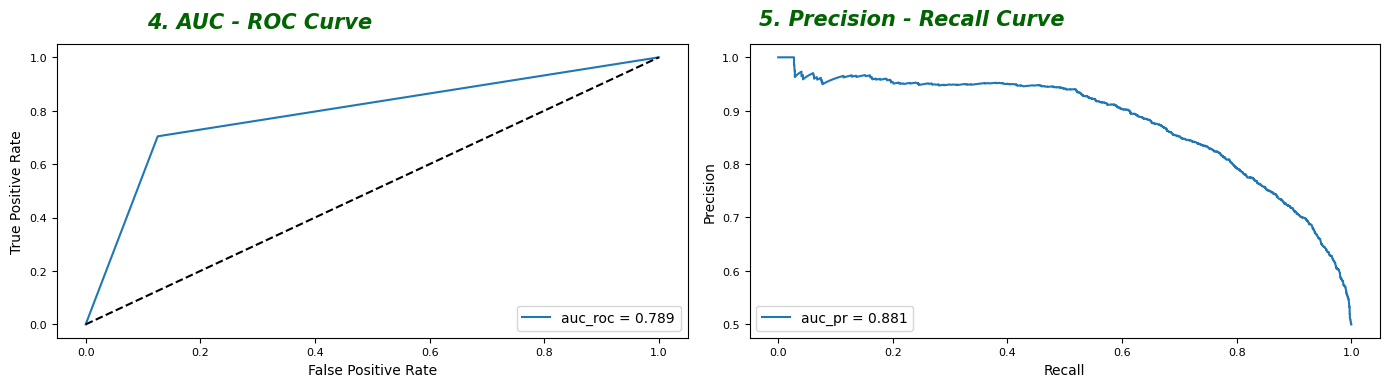

[[0.7695439739413681,
  0.587152022943265,
  0.848294434470377,
  0.7041728763040238,
  0.7893561592854484,
  0.789261159341603,
  0.880718970178391]]

In [107]:
Generate_Model_Test_Classification_Report(pModel, x_test_anova, y_test_anova, 'Perceptron (ANOVA-F)')

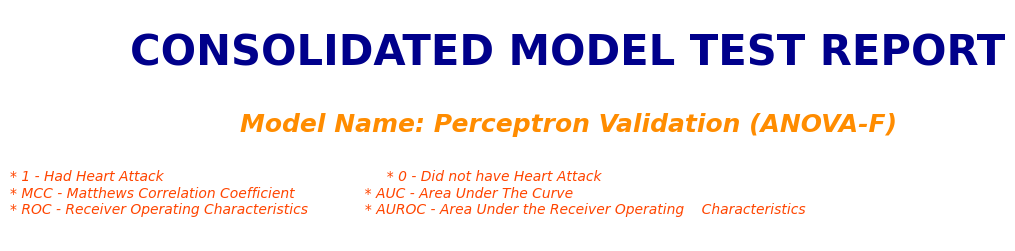

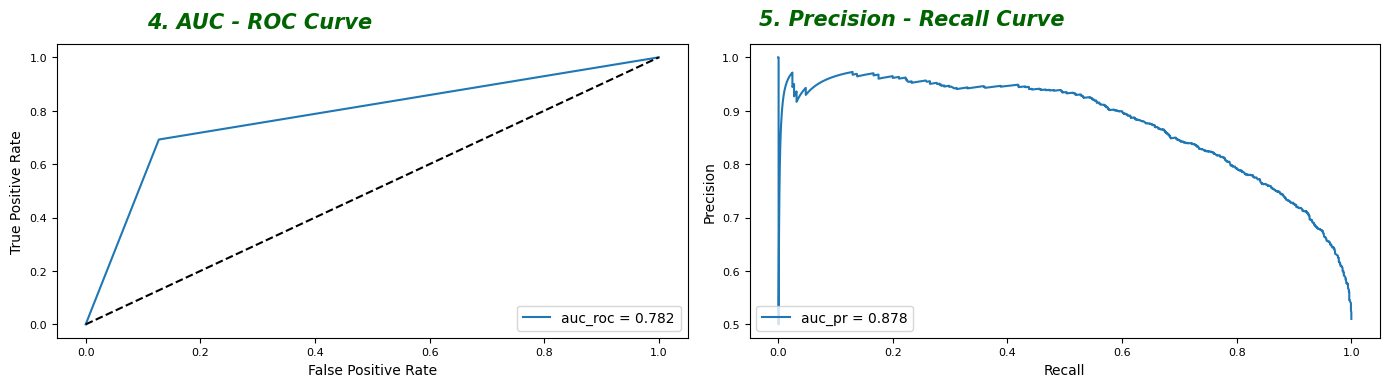

[[0.7628617363344051,
  0.5726138214962407,
  0.8495971351835273,
  0.6921954777534646,
  0.7804242649795311,
  0.7822679516426898,
  0.8779528715801719]]

In [108]:
Generate_Model_Test_Classification_Report(pModel, x_val_anova, y_val_anova, 'Perceptron Validation (ANOVA-F)')

In [109]:
from sklearn.linear_model import SGDClassifier

In [110]:
sgdModel=SGDClassifier(loss='log_loss')
sgdModel=sgdModel.fit(x_train_anova, y_train_anova)
sgdResults=sgdModel.predict(x_test_anova)

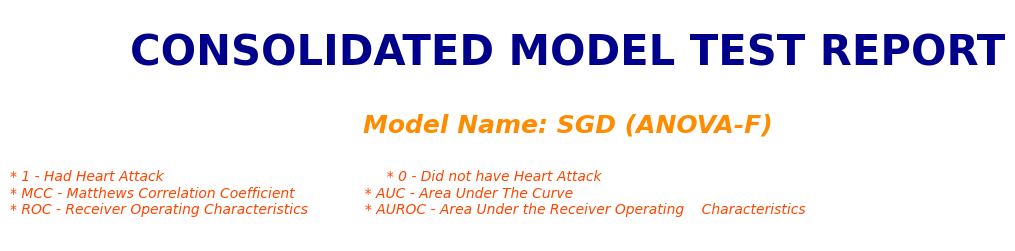

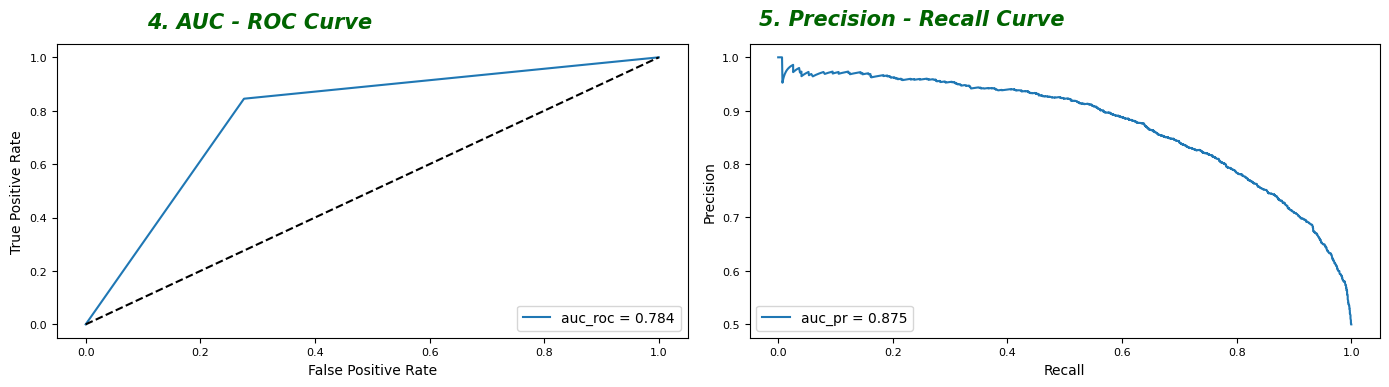

[[0.796488147497805,
  0.5729796395947885,
  0.7532381268681502,
  0.8450074515648286,
  0.78433196873837,
  0.7843996365630835,
  0.8754908453573466]]

In [111]:
Generate_Model_Test_Classification_Report(sgdModel, x_test_anova, y_test_anova, 'SGD (ANOVA-F)')

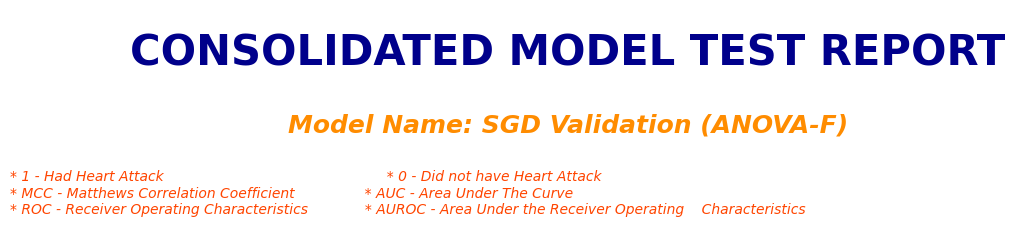

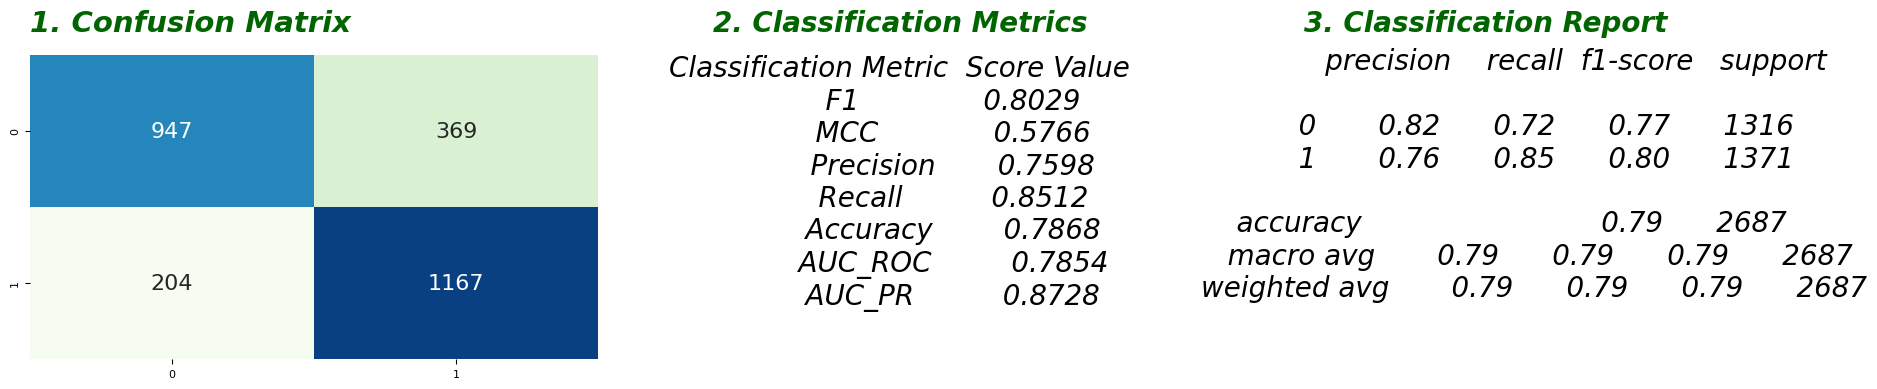

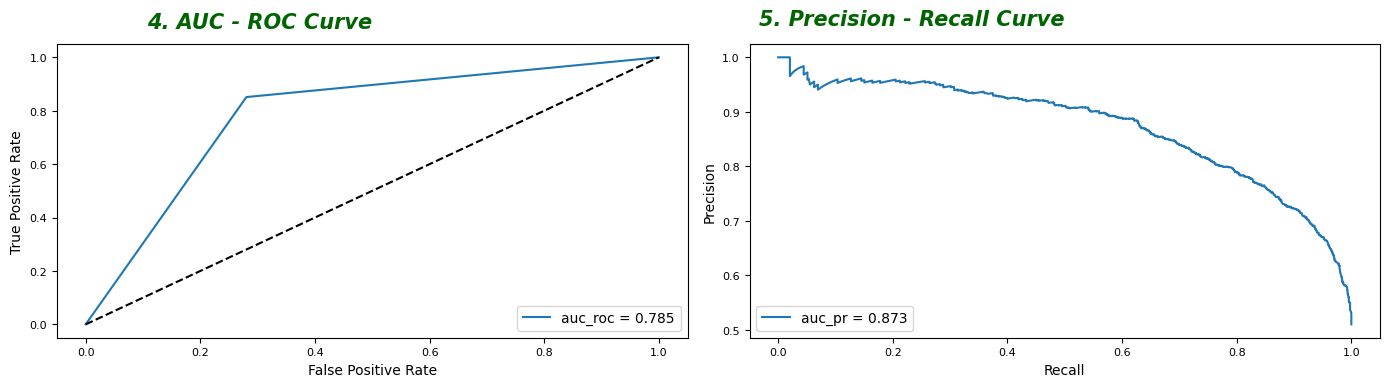

[[0.802889576883385,
  0.5766386268467474,
  0.759765625,
  0.8512035010940919,
  0.7867510234462226,
  0.7854041821579882,
  0.872820711843878]]

In [112]:
Generate_Model_Test_Classification_Report(sgdModel, x_val_anova, y_val_anova, 'SGD Validation (ANOVA-F)')

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
lrModel=LogisticRegression(max_iter=30000)
lrModel=lrModel.fit(x_train_anova, y_train_anova)
lrResults=lrModel.predict(x_test_anova)

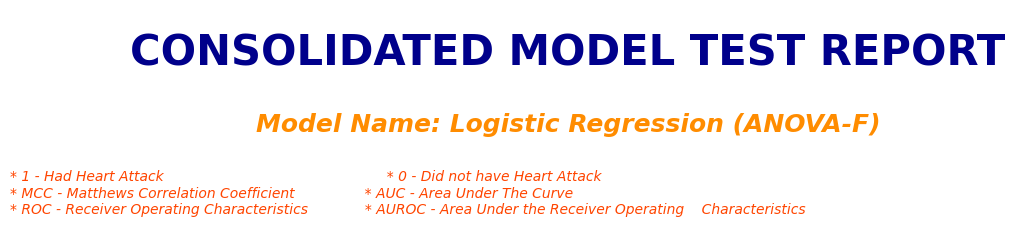

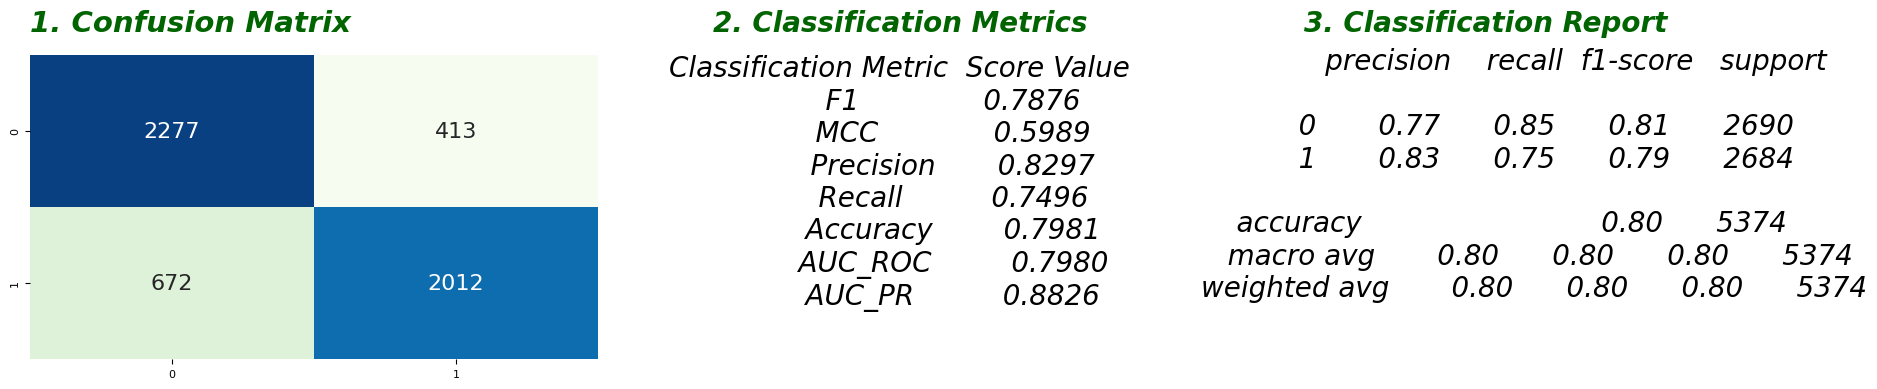

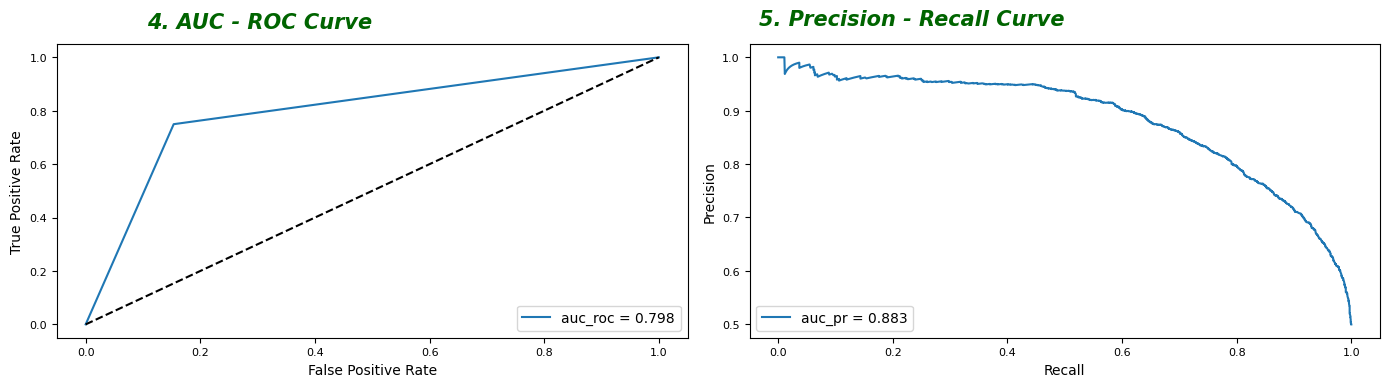

[[0.7876296731258563,
  0.5989495139359078,
  0.8296907216494845,
  0.7496274217585693,
  0.7981019724599926,
  0.7980479116227791,
  0.8825976337055919]]

In [115]:
Generate_Model_Test_Classification_Report(lrModel, x_test_anova, y_test_anova, 'Logistic Regression (ANOVA-F)')

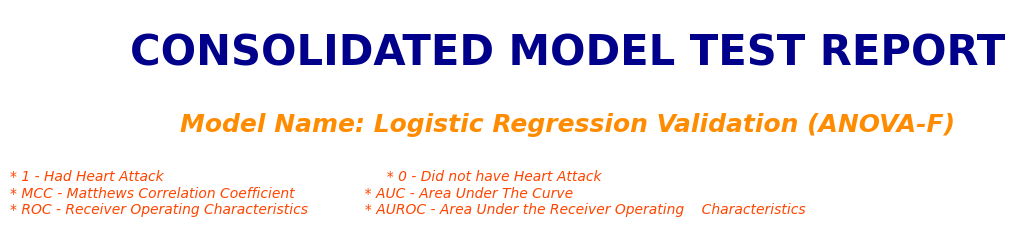

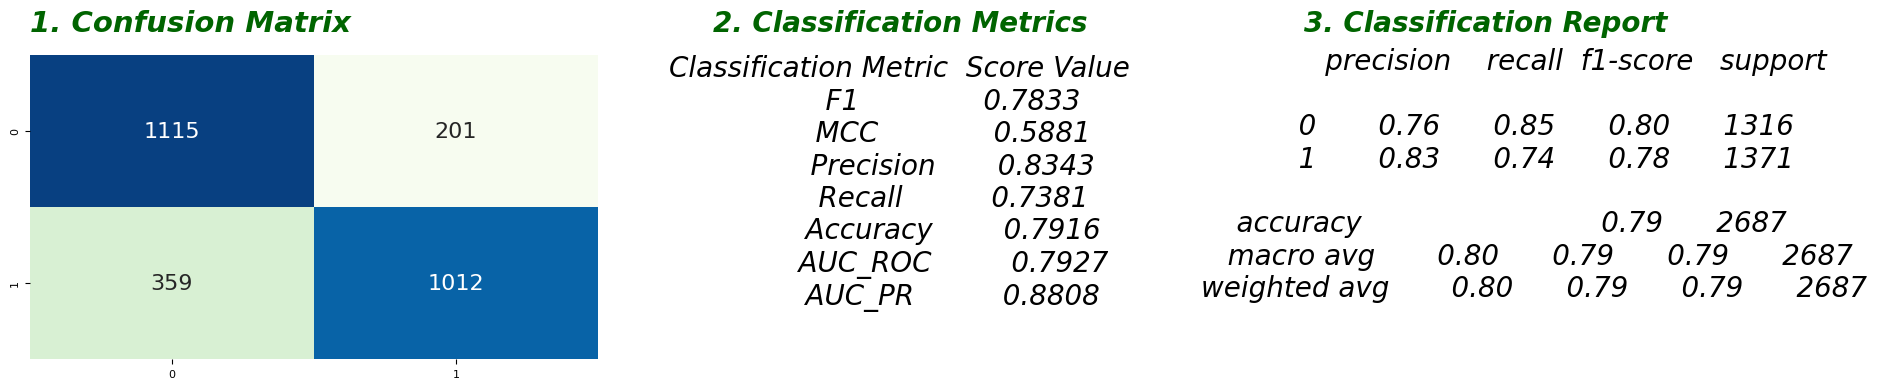

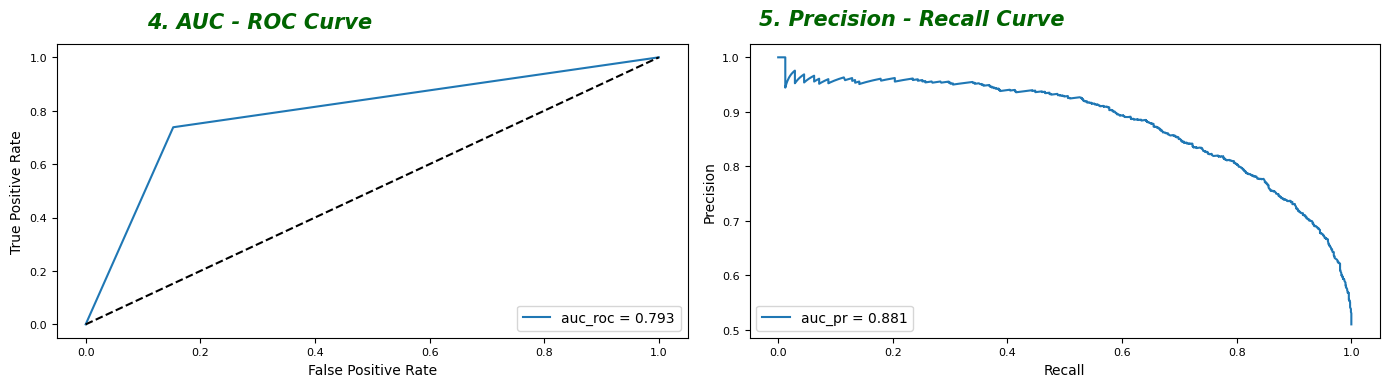

[[0.78328173374613,
  0.58806994450673,
  0.8342951360263808,
  0.738147337709701,
  0.7915891328619278,
  0.7927058876998353,
  0.8807927415725145]]

In [116]:
Generate_Model_Test_Classification_Report(lrModel, x_val_anova, y_val_anova, 'Logistic Regression Validation (ANOVA-F)')

In [117]:
from sklearn.svm import LinearSVC
x_train_anova.shape

(18809, 10)

In [118]:
svmModel=CalibratedClassifierCV(LinearSVC(max_iter=300000))
svmModel=svmModel.fit(x_train_anova, y_train_anova)
svmResults=svmModel.predict(x_test_anova)

In [119]:
x_train_anova.shape

(18809, 10)

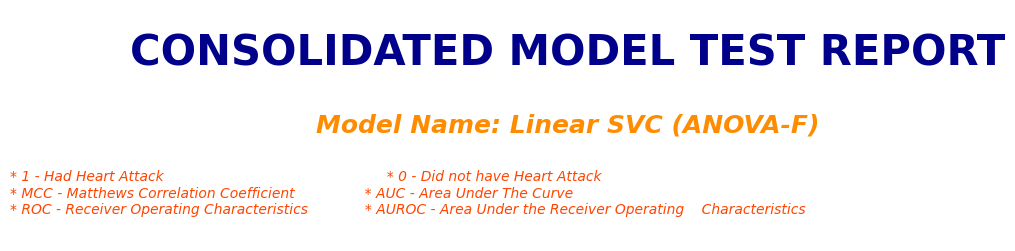

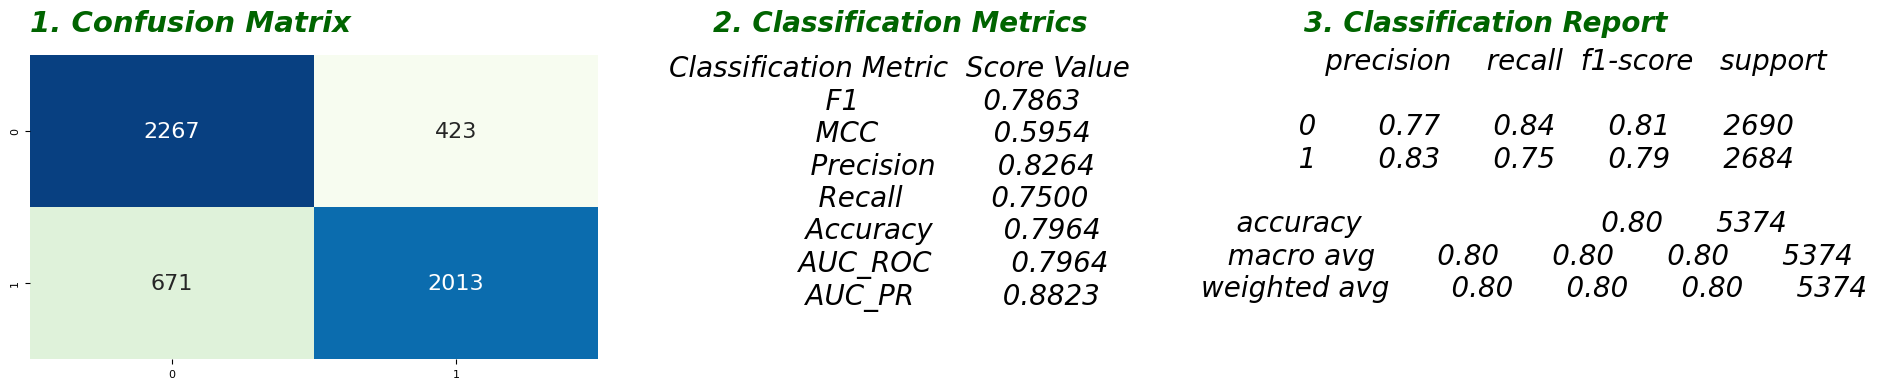

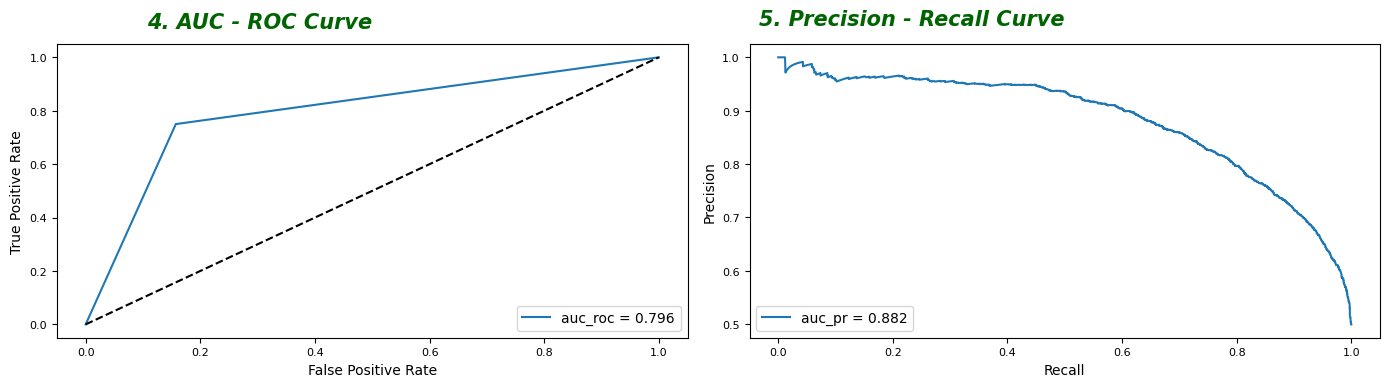

[[0.786328125,
  0.5953537611361627,
  0.8263546798029556,
  0.75,
  0.7964272422776331,
  0.7963754646840149,
  0.8822719757607322]]

In [120]:
Generate_Model_Test_Classification_Report(svmModel, x_test_anova, y_test_anova, 'Linear SVC (ANOVA-F)')

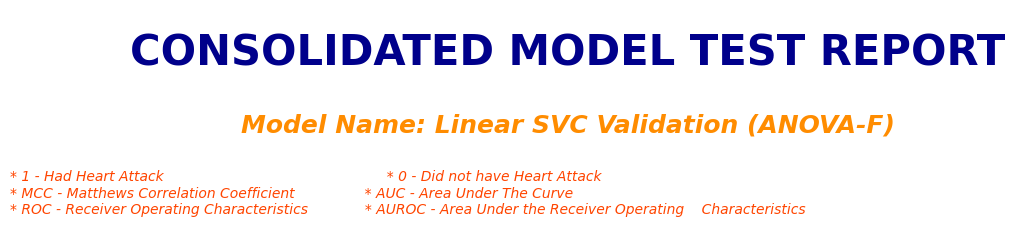

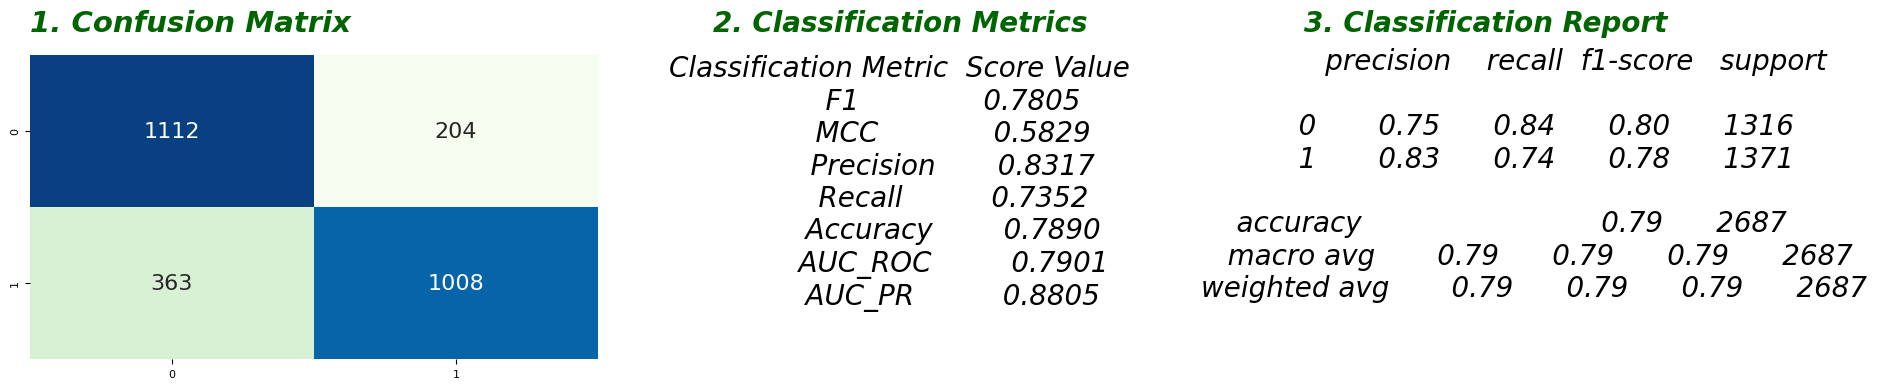

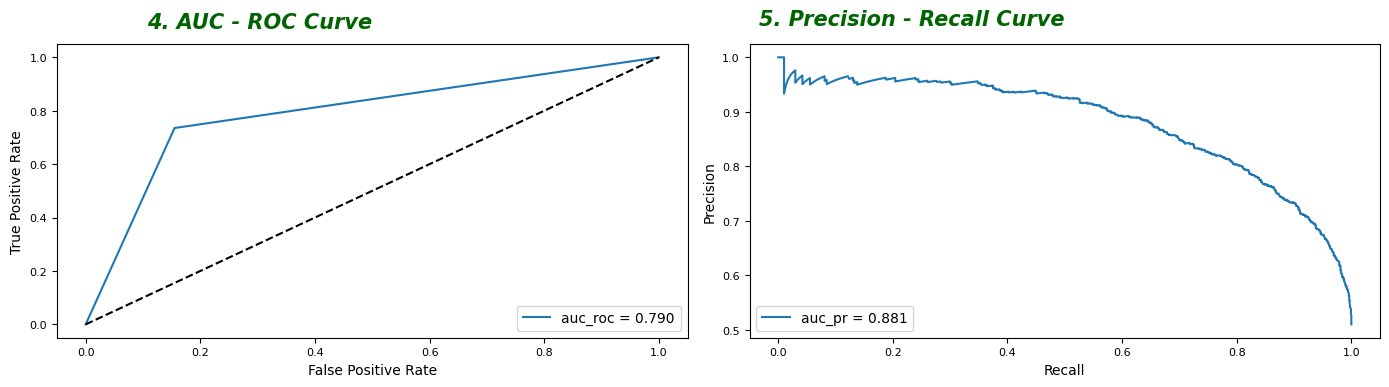

[[0.7804878048780488,
  0.5828918406940683,
  0.8316831683168316,
  0.7352297592997812,
  0.7889839970227019,
  0.790107280865696,
  0.8805149463656095]]

In [121]:
Generate_Model_Test_Classification_Report(svmModel, x_val_anova, y_val_anova, 'Linear SVC Validation (ANOVA-F)')

## Chi Squared

In [122]:
x_train_chisq=x_train
x_test_chisq=x_test
y_train_chisq=y_train
y_test_chisq=y_test
x_val_chisq=x_val
y_val_chisq=y_val

In [123]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import chi2

In [124]:
chisq=SelectKBest(score_func=chi2, k=10)
chisq.fit(x_train_chisq, y_train_chisq)


SelectKBest(score_func=<function chi2 at 0x0000018E7BA795A0>)

In [125]:
x_train_chisq

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
57747      15    1              1                 5.0               0.0   
194270     44    2              3                 0.0               0.0   
134406     30    1              1                 0.0               0.0   
23565       6    1              3                 4.0               2.0   
79090      19    2              5                30.0              30.0   
...       ...  ...            ...                 ...               ...   
79017      19    1              4                12.0               0.0   
71956      17    2              4                 0.0              15.0   
162498     36    2              3                14.0               0.0   
240221     52    1              2                 0.0               0.0   
103484     23    1              4                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
57747                 3                   1         6.0             1   
194270                1                   1         9.0             4   
134406                1                   1         7.0             1   
23565                 3                   1         7.0             4   
79090                 1                   2         4.0             1   
...                 ...                 ...         ...           ...   
79017                 2                   1         9.0             2   
71956                 1                   2         5.0             1   
162498                2                   2         5.0             3   
240221                1                   1         6.0             1   
103484                1                   1         5.0             1   

        HadAngina  ...  HeightInMeters  WeightInKilograms    BMI  \
57747           2  ...            1.78              90.72  28.70   
194270          2  ...            1.55             111.13  46.29   
134406          2  ...            1.70              74.84  25.84   
23565           1  ...            1.80              77.11  23.80   
79090           2  ...            1.57              72.57  29.26   
...           ...  ...             ...                ...    ...   
79017           1  ...            1.70              83.46  28.82   
71956           2  ...            1.63              90.72  34.33   
162498          2  ...            1.68              71.67  25.50   
240221          1  ...            1.78              83.91  26.54   
103484          2  ...            1.65              77.11  28.29   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
57747                 1           1             2              2   
194270                2           1             1              2   
134406                2           2             1              2   
23565                 1           2             1              2   
79090                 2           1             2              1   
...                 ...         ...           ...            ...   
79017                 2           2             2              2   
71956                 1           1             2              2   
162498                2           1             2              1   
240221                1           1             1              1   
103484                2           1             2              2   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
57747                   1                 1         1  
194270                  4                 2         2  
134406                  4                 2         2  
23565                   3                 2         2  
79090                   3                 2         1  
...                   ...               ...       ...  
79017                   3                 2         1  
71956                   4                 1         1  
162498                  3                 2         2  
240221                  1           

In [126]:
a=chisq.get_support().tolist()
b=x_train_chisq.columns.tolist()

selectedVars2=[]
i=0

while i < len(a):
    if a[i]==True:
        selectedVars2.append(b[i])
    i=i+1

In [127]:
selectedVars2

['GeneralHealth',
 'PhysicalHealthDays',
 'MentalHealthDays',
 'RemovedTeeth',
 'HadAngina',
 'HadDiabetes',
 'ChestScan',
 'AgeCategory',
 'WeightInKilograms',
 'PneumoVaxEver']

In [128]:
chisq.get_support()

array([False, False,  True,  True,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False])

In [129]:
x_train_chisq=x_train_chisq[selectedVars2]
x_test_chisq=x_test_chisq[selectedVars2]

x_val_chisq=x_val_chisq[selectedVars2]
x_val_chisq=x_val_chisq[selectedVars2]

In [130]:
x_train_chisq

GeneralHealth  PhysicalHealthDays  MentalHealthDays  RemovedTeeth  \
57747               1                 5.0               0.0             1   
194270              3                 0.0               0.0             4   
134406              1                 0.0               0.0             1   
23565               3                 4.0               2.0             4   
79090               5                30.0              30.0             1   
...               ...                 ...               ...           ...   
79017               4                12.0               0.0             2   
71956               4                 0.0              15.0             1   
162498              3                14.0               0.0             3   
240221              2                 0.0               0.0             1   
103484              4                 0.0               0.0             1   

        HadAngina  HadDiabetes  ChestScan  AgeCategory  WeightInKilograms  \
57747           2            3          1            8              90.72   
194270          2            3          2            4             111.13   
134406          2            3          2           10              74.84   
23565           1            3          1            5              77.11   
79090           2            3          1            7              72.57   
...           ...          ...        ...          ...                ...   
79017           1            3          2           11              83.46   
71956           2            3          1            3              90.72   
162498          2            4          1            9              71.67   
240221          1            1          1            8              83.91   
103484          2            3          2            4              77.11   

        PneumoVaxEver  
57747               2  
194270              2  
134406              2  
23565               2  
79090               1  
...               ...  
79017               2  
71956               2  
162498              1  
240221              1  
103484              2  

[18809 rows x 10 columns]

In [131]:
x_test_chisq

GeneralHealth  PhysicalHealthDays  MentalHealthDays  RemovedTeeth  \
42673               5                30.0               3.0             1   
240161              5                30.0               0.0             4   
126186              3                 0.0               0.0             1   
86686               1                 0.0               0.0             1   
76530               2                 0.0               0.0             4   
...               ...                 ...               ...           ...   
168369              5                30.0              10.0             1   
30168               4                 3.0               2.0             2   
71334               2                 0.0               0.0             4   
222407              2                 0.0               0.0             4   
28573               1                 0.0               0.0             4   

        HadAngina  HadDiabetes  ChestScan  AgeCategory  WeightInKilograms  \
42673           2            1          1           12              58.97   
240161          1            1          1            9              56.70   
126186          2            3          2           12              74.84   
86686           1            3          2           12              58.06   
76530           2            3          1            9             103.42   
...           ...          ...        ...          ...                ...   
168369          2            3          1            9              77.56   
30168           1            2          1           13              62.60   
71334           1            3          2           10              81.65   
222407          2            1          2            9             133.81   
28573           2            3          1            6             104.33   

        PneumoVaxEver  
42673               1  
240161              1  
126186              2  
86686               1  
76530               2  
...               ...  
168369              1  
30168               1  
71334               2  
222407              1  
28573               1  

[5374 rows x 10 columns]

In [132]:
pModel=CalibratedClassifierCV(Perceptron())
pModel=pModel.fit(x_train_chisq, y_train_chisq)
pResults=pModel.predict(x_test_chisq)

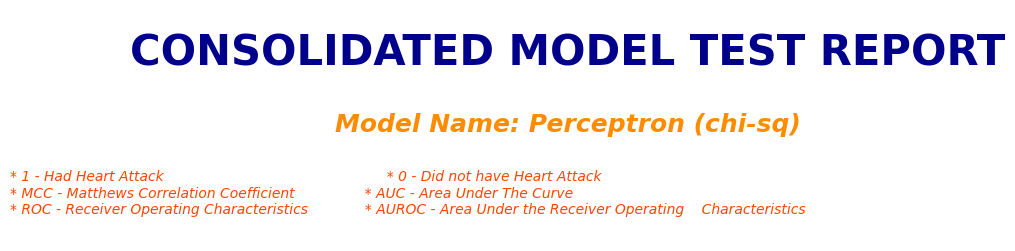

[[0.7891416555151979,
  0.5902489364112706,
  0.8103651354534747,
  0.7690014903129657,
  0.7947525120952735,
  0.7947237934836203,
  0.8739841237818811]]

In [133]:
Generate_Model_Test_Classification_Report(pModel, X_test=x_test_chisq, y_test=y_test_chisq, model_name='Perceptron (chi-sq)')

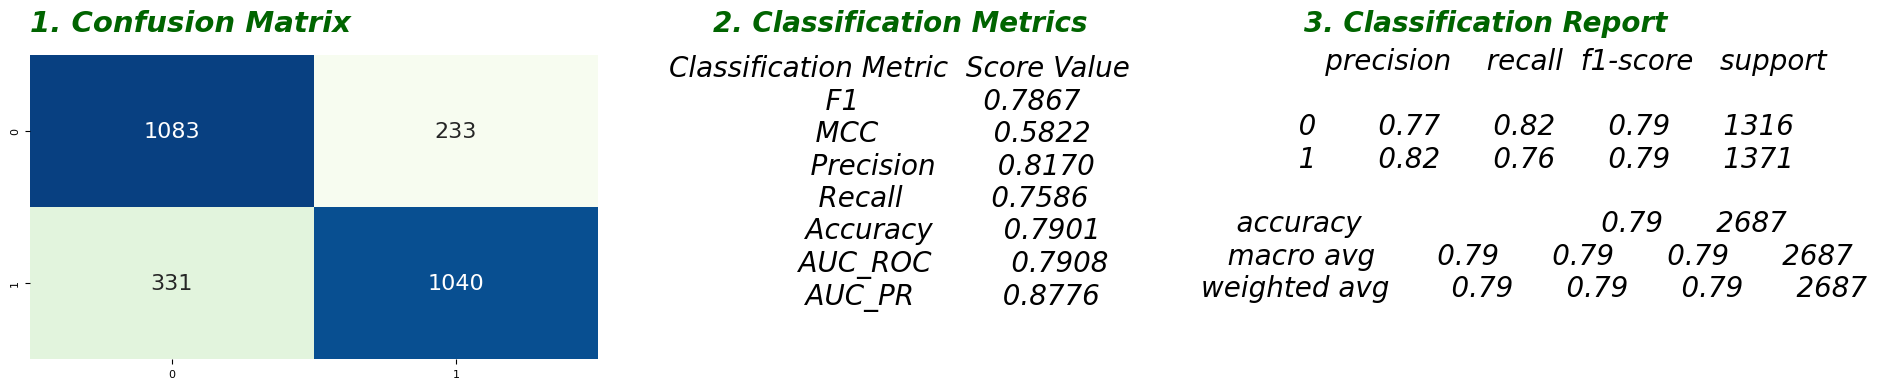

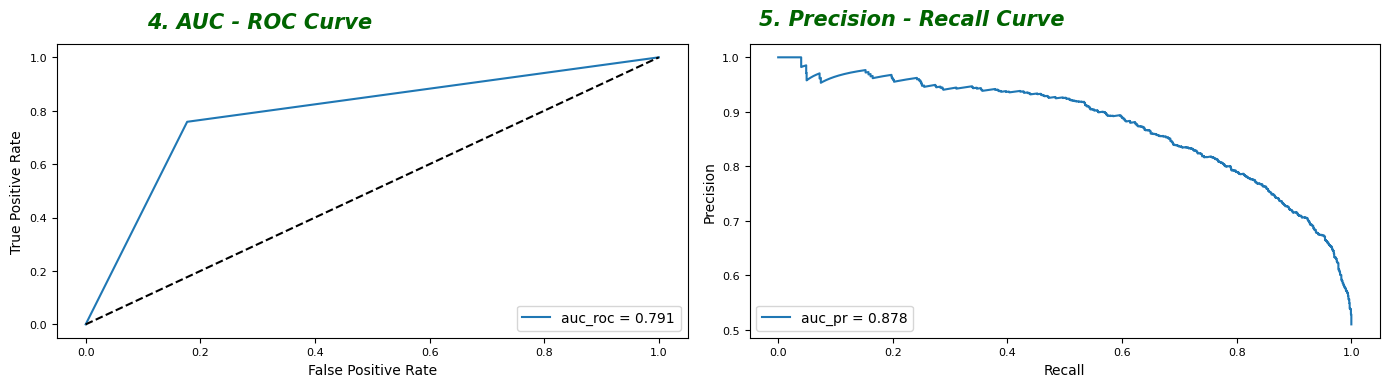

[[0.7866868381240545,
  0.5821990085662018,
  0.816967792615868,
  0.7585703865791393,
  0.7901004838109416,
  0.7907593574233083,
  0.8775526641173711]]

In [134]:
Generate_Model_Test_Classification_Report(pModel, x_val_chisq, y_val_chisq, 'Perceptron Validation (chi-sq)')

In [135]:
sgdModel=SGDClassifier(loss='log_loss')
sgdModel=sgdModel.fit(x_train_chisq, y_train_chisq)
sgdResults=sgdModel.predict(x_test_chisq)

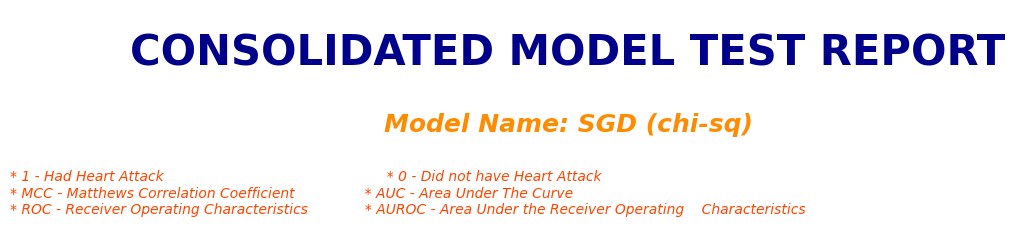

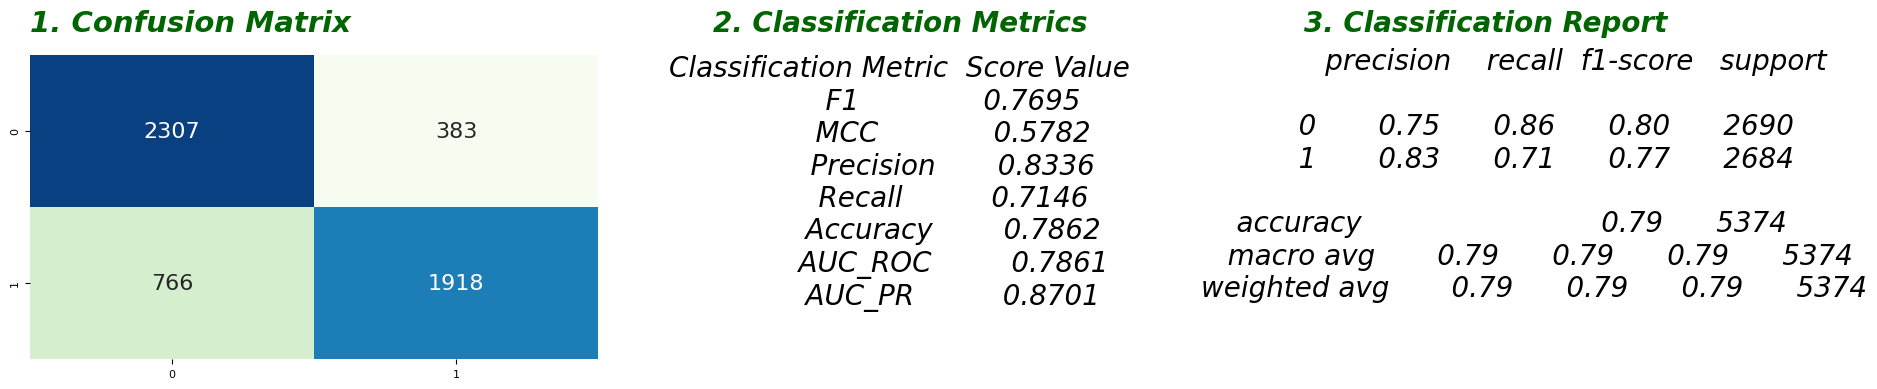

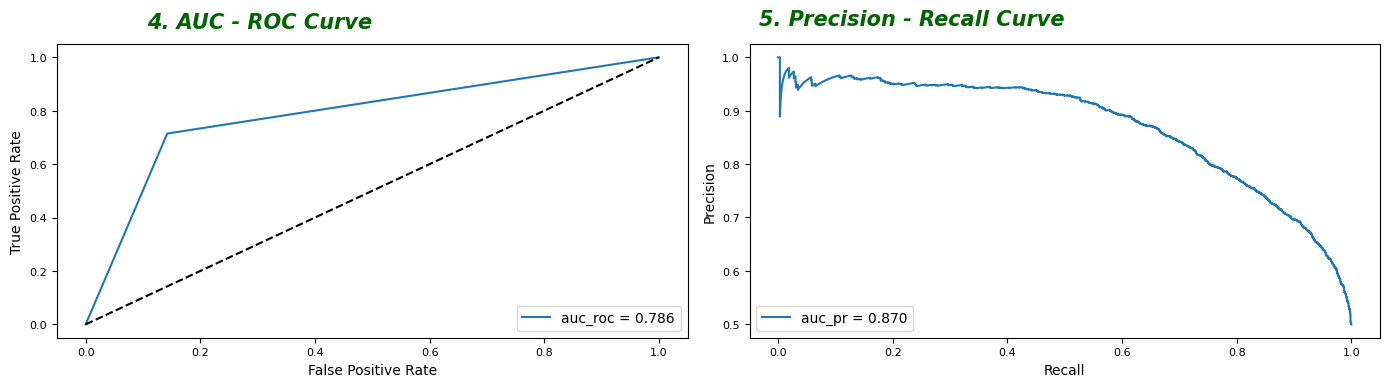

[[0.7695085255767301,
  0.5782229242282052,
  0.8335506301607997,
  0.7146050670640834,
  0.7861927800521027,
  0.7861129424539749,
  0.8701483309649491]]

In [136]:
Generate_Model_Test_Classification_Report(sgdModel, X_test=x_test_chisq, y_test=y_test_chisq, model_name='SGD (chi-sq)')

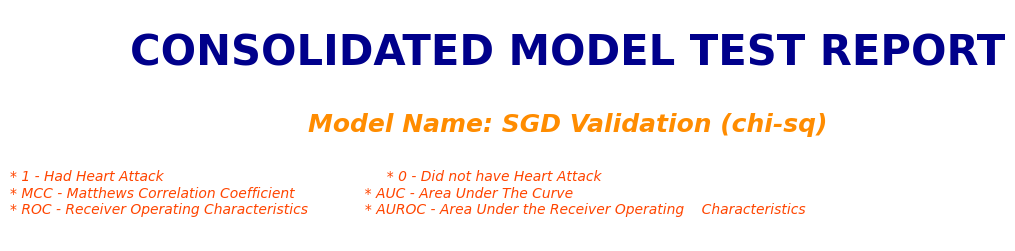

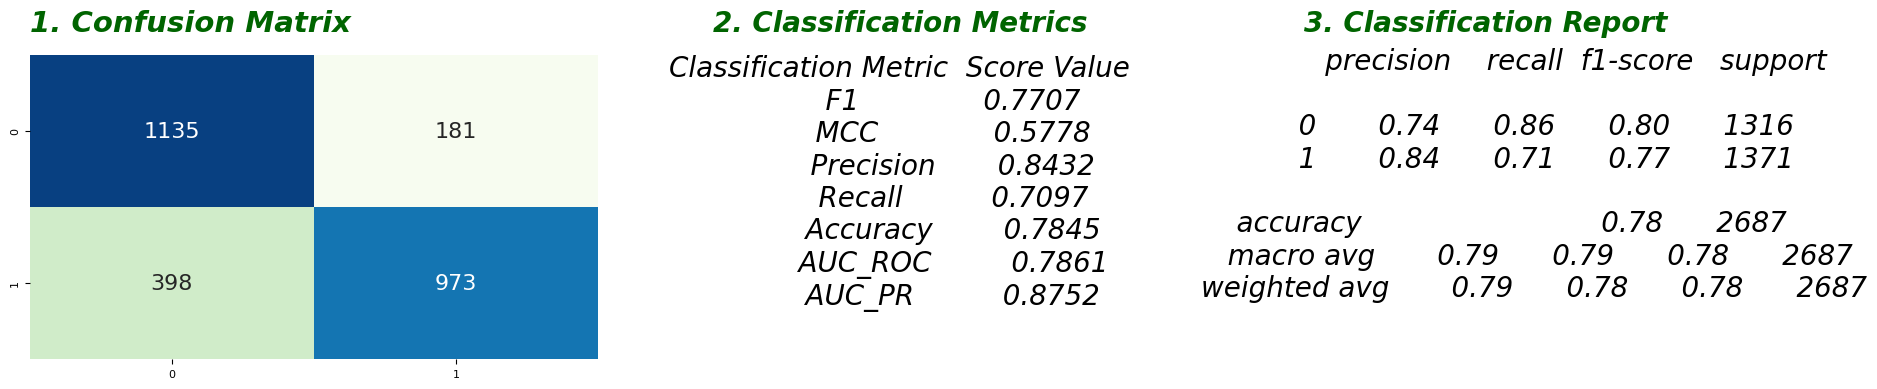

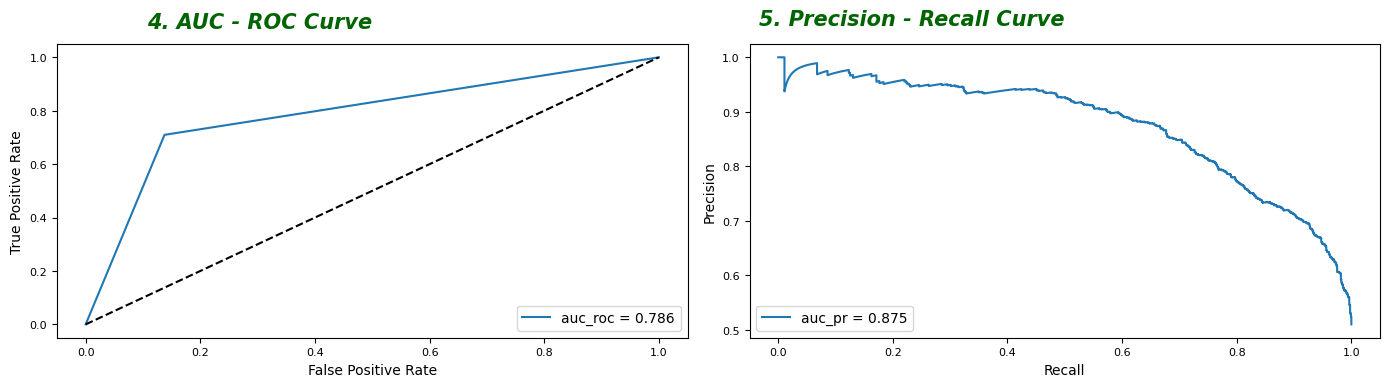

[[0.7706930693069307,
  0.5778198077021712,
  0.8431542461005199,
  0.7097009482129832,
  0.7845180498697432,
  0.7860814771460053,
  0.875171533299929]]

In [137]:
Generate_Model_Test_Classification_Report(sgdModel, x_val_chisq, y_val_chisq, 'SGD Validation (chi-sq)')

In [138]:
lrModel=LogisticRegression(max_iter=300000)
lrModel=lrModel.fit(x_train_chisq, y_train_chisq)
lrResults=lrModel.predict(x_test_chisq)

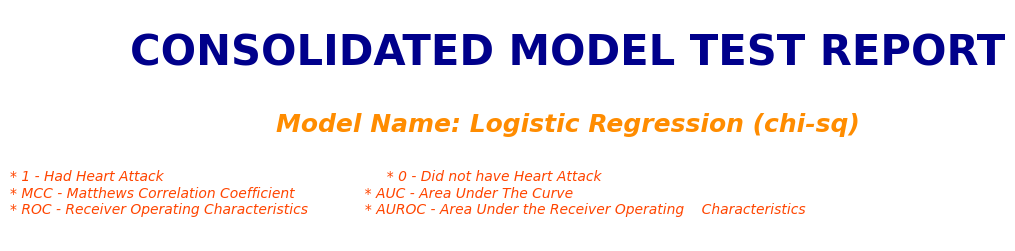

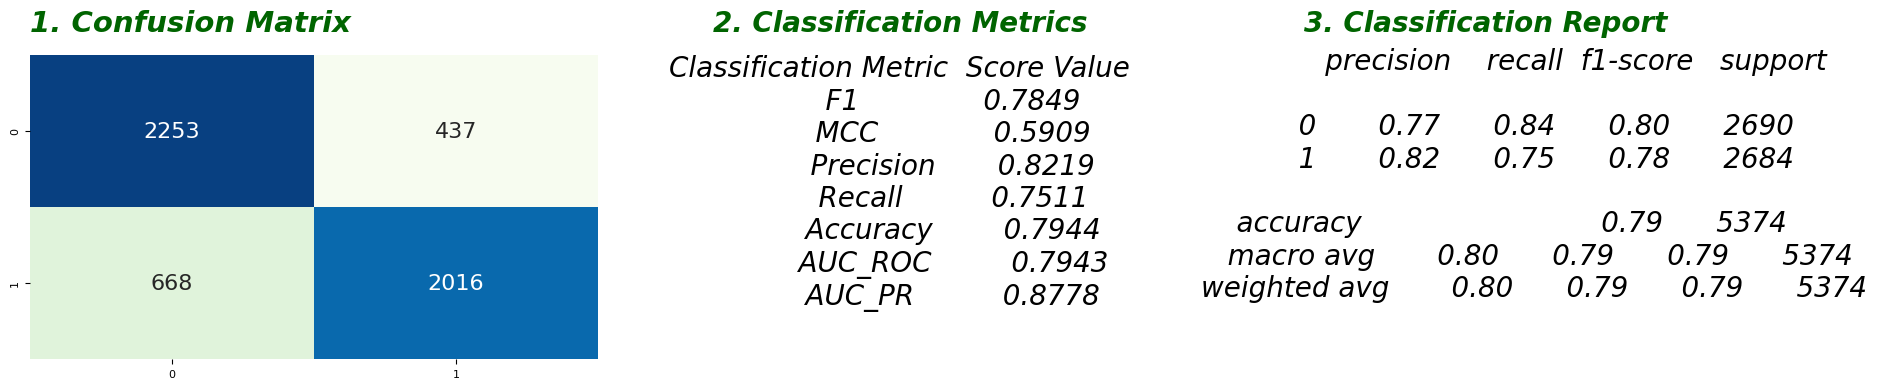

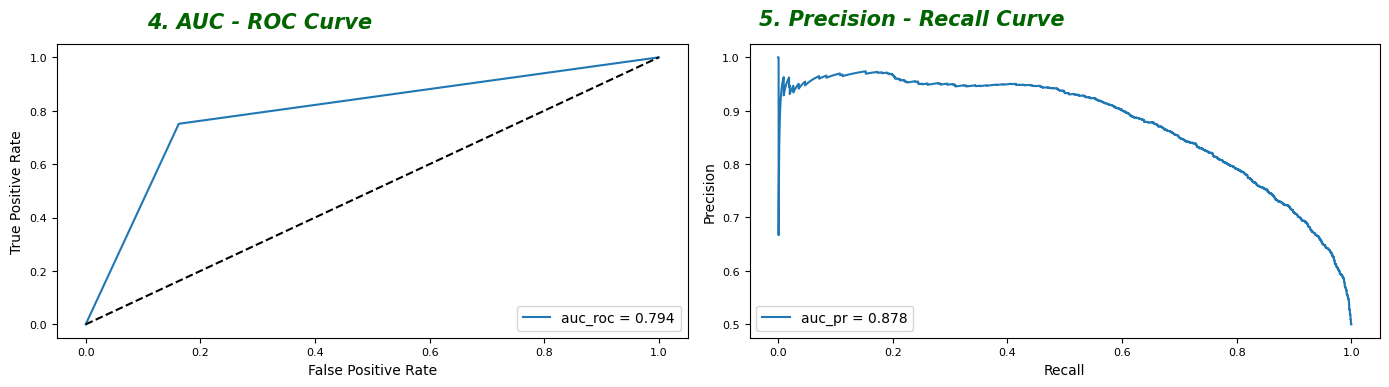

[[0.7848939069495815,
  0.590908817006097,
  0.8218507949449654,
  0.7511177347242921,
  0.794380349832527,
  0.7943321015628896,
  0.877842640369987]]

In [139]:
Generate_Model_Test_Classification_Report(lrModel, X_test=x_test_chisq, y_test=y_test_chisq, model_name='Logistic Regression (chi-sq)')

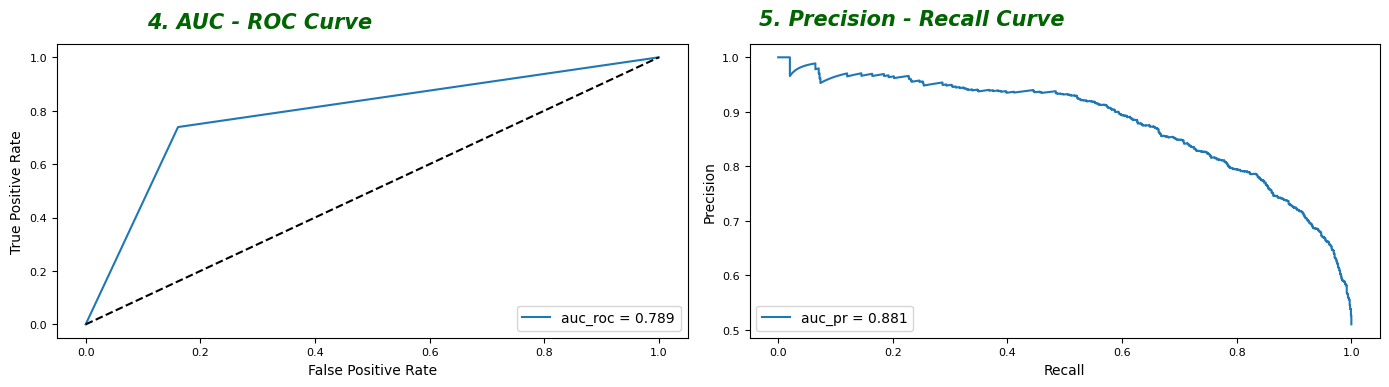

[[0.7804314329738059,
  0.5799216609807246,
  0.8269387755102041,
  0.7388767323121809,
  0.7878675102344622,
  0.7888912536940844,
  0.8812570193677679]]

In [140]:
Generate_Model_Test_Classification_Report(lrModel, x_val_chisq, y_val_chisq, 'Logistic Regression Validation (chi-sq)')

In [141]:
svmModel=CalibratedClassifierCV(LinearSVC(max_iter=50000))
svmModel=svmModel.fit(x_train_chisq, y_train_chisq)
svmResults=svmModel.predict(x_test_chisq)

c:\Users\alexg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\alexg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\alexg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\alexg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\alexg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

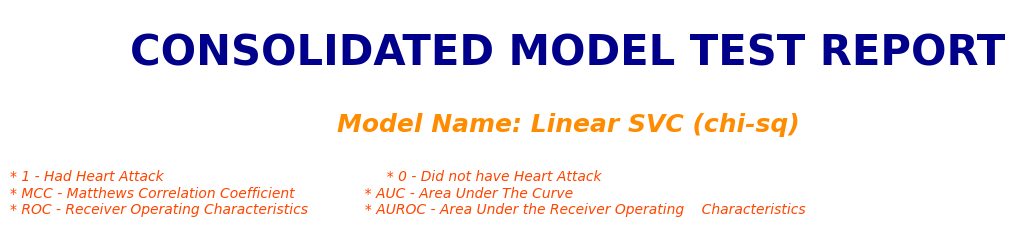

[[0.7866563227307991,
  0.5924320769949856,
  0.8203883495145631,
  0.7555886736214605,
  0.7953107554893933,
  0.795266455769838,
  0.8773192796967035]]

In [142]:
Generate_Model_Test_Classification_Report(svmModel, X_test=x_test_chisq, y_test=y_test_chisq, model_name='Linear SVC (chi-sq)')

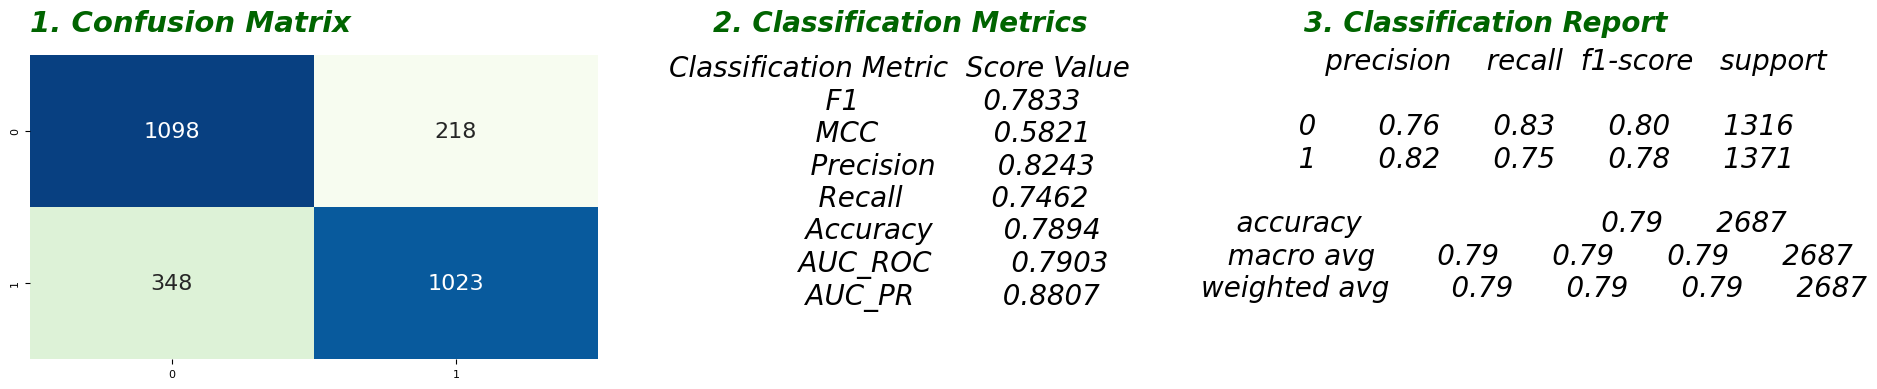

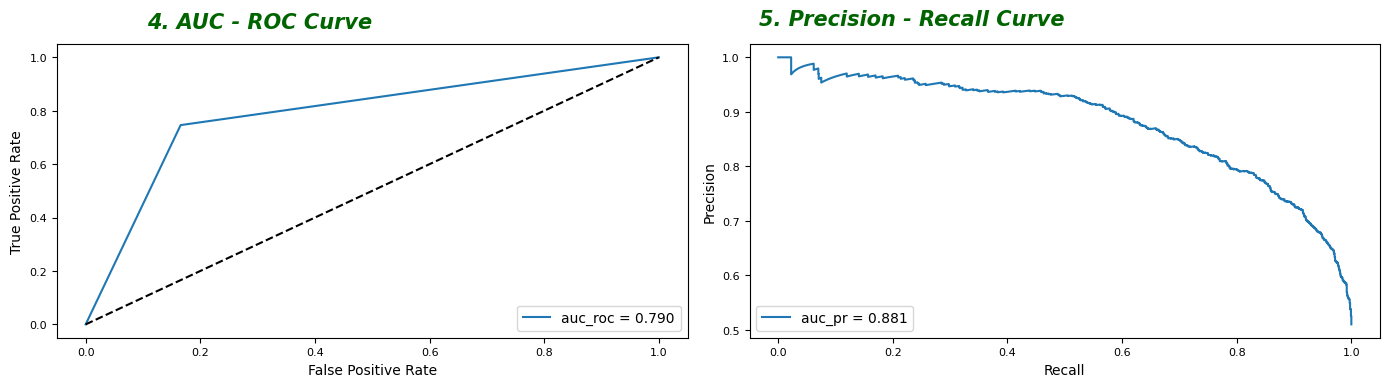

[[0.7833078101071974,
  0.5820921116380533,
  0.8243352135374697,
  0.7461706783369803,
  0.7893561592854484,
  0.7902585914481253,
  0.8806844071399517]]

In [143]:
Generate_Model_Test_Classification_Report(svmModel, x_val_chisq, y_val_chisq, 'Linear SVC Validation (chi-sq)')

## LASSO Feature Selection

In [144]:
#Data condensation using LASSO penalty
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import preprocessing

data_original = pd.read_csv('heart_data_cleaned.csv')

data_original['HadHeartAttack'].replace(to_replace={1:0, 2:1}, inplace=True)

opLabel = np.array(data_original['HadHeartAttack'])
data = data_original.drop(columns='HadHeartAttack')

featureVote = np.zeros(data.shape[1])
print(featureVote.shape)

iteR = 100

for num in range(iteR):
    label0_indx = np.where(opLabel==0)[0]   #heart attack
    label1_indx = np.where(opLabel==1)[0]   #no heart attack
    numTrainData0 = 13000
    numTrainData1 = 13000
    np.random.shuffle(label0_indx)
    np.random.shuffle(label1_indx)

    label0_indx_train = label0_indx[0:numTrainData0-1]
    label1_indx_train = label1_indx[0:numTrainData1-1]
    label0_indx_test  = label0_indx[numTrainData0-1:]
    label1_indx_test  = label1_indx[numTrainData1-1:]

    testIndx  = np.append(label0_indx_test,label1_indx_test)
    trainIndx = np.append(label0_indx_train,label1_indx_train)
    trainData  =  data.iloc[trainIndx]
    trainLabel =  opLabel[trainIndx]
    testData   =  data.iloc[testIndx]
    testLabel  =  opLabel[testIndx]

    ##%% data standardization
    scaler = preprocessing.StandardScaler().fit(trainData)
    trainData_scaled = scaler.transform(trainData)
    testData_scaled  = scaler.transform(testData)

    ##%% Lasso from scikit

    regr = Lasso(random_state=0, alpha=0.006, tol=0.000001, max_iter=100000)

    regr.fit(trainData_scaled,trainLabel)
    cof = np.abs(regr.coef_)
    colIndx = np.where(cof != 0)[0]
    for col in colIndx:
        featureVote[col]+=1

(39,)


In [145]:
print(featureVote)
print(iter)

[  0. 100. 100.   0.   6. 100.  82.  64. 100. 100. 100.   8.   2.  99.
   5.  37.  99. 100. 100. 100.  98. 100.   0.  70. 100.  28. 100.  48.
 100.   0.   0.   7. 100.   0.  86.  90.  84.   1.  35.]
<built-in function iter>


In [146]:
# feature nomination via Lasso (from feature 1 to 30)
# We keep the dummy variables
varb = np.array(data.columns)

thresH = 6
featureIndx = np.where(featureVote[0:38]>=thresH)[0]
featureIndx = np.append(featureIndx, np.arange(39,data.shape[1]))
print(varb[featureIndx])

featureDrop = np.where(featureVote[0:38]<thresH)[0]
print(varb[featureDrop])

['Sex' 'GeneralHealth' 'MentalHealthDays' 'LastCheckupTime'
 'PhysicalActivities' 'SleepHours' 'RemovedTeeth' 'HadAngina' 'HadStroke'
 'HadAsthma' 'HadCOPD' 'HadKidneyDisease' 'HadArthritis' 'HadDiabetes'
 'DeafOrHardOfHearing' 'BlindOrVisionDifficulty' 'DifficultyConcentrating'
 'DifficultyWalking' 'DifficultyErrands' 'SmokerStatus' 'ECigaretteUsage'
 'ChestScan' 'RaceEthnicityCategory' 'AgeCategory' 'BMI' 'AlcoholDrinkers'
 'FluVaxLast12' 'PneumoVaxEver' 'TetanusLast10Tdap']
['State' 'PhysicalHealthDays' 'HadSkinCancer' 'HadDepressiveDisorder'
 'DifficultyDressingBathing' 'HeightInMeters' 'WeightInKilograms'
 'HIVTesting' 'HighRiskLastYear']


In [147]:
Drop = ['State', 'PhysicalHealthDays', 'HadAsthma','HadSkinCancer', 'HadDepressiveDisorder', 'DifficultyDressingBathing', 'HeightInMeters', 'WeightInKilograms', 'HIVTesting', 'HighRiskLastYear']

In [148]:
x_train_lasso=x_train
x_test_lasso=x_test
y_train_lasso=y_train
y_test_lasso=y_test
x_val_lasso=x_val
y_val_lasso=y_val

In [149]:
x_train_lasso

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
57747      15    1              1                 5.0               0.0   
194270     44    2              3                 0.0               0.0   
134406     30    1              1                 0.0               0.0   
23565       6    1              3                 4.0               2.0   
79090      19    2              5                30.0              30.0   
...       ...  ...            ...                 ...               ...   
79017      19    1              4                12.0               0.0   
71956      17    2              4                 0.0              15.0   
162498     36    2              3                14.0               0.0   
240221     52    1              2                 0.0               0.0   
103484     23    1              4                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
57747                 3                   1         6.0             1   
194270                1                   1         9.0             4   
134406                1                   1         7.0             1   
23565                 3                   1         7.0             4   
79090                 1                   2         4.0             1   
...                 ...                 ...         ...           ...   
79017                 2                   1         9.0             2   
71956                 1                   2         5.0             1   
162498                2                   2         5.0             3   
240221                1                   1         6.0             1   
103484                1                   1         5.0             1   

        HadAngina  ...  HeightInMeters  WeightInKilograms    BMI  \
57747           2  ...            1.78              90.72  28.70   
194270          2  ...            1.55             111.13  46.29   
134406          2  ...            1.70              74.84  25.84   
23565           1  ...            1.80              77.11  23.80   
79090           2  ...            1.57              72.57  29.26   
...           ...  ...             ...                ...    ...   
79017           1  ...            1.70              83.46  28.82   
71956           2  ...            1.63              90.72  34.33   
162498          2  ...            1.68              71.67  25.50   
240221          1  ...            1.78              83.91  26.54   
103484          2  ...            1.65              77.11  28.29   

        AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
57747                 1           1             2              2   
194270                2           1             1              2   
134406                2           2             1              2   
23565                 1           2             1              2   
79090                 2           1             2              1   
...                 ...         ...           ...            ...   
79017                 2           2             2              2   
71956                 1           1             2              2   
162498                2           1             2              1   
240221                1           1             1              1   
103484                2           1             2              2   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
57747                   1                 1         1  
194270                  4                 2         2  
134406                  4                 2         2  
23565                   3                 2         2  
79090                   3                 2         1  
...                   ...               ...       ...  
79017                   3                 2         1  
71956                   4                 1         1  
162498                  3                 2         2  
240221                  1           

In [150]:
x_train_lasso=x_train_lasso.drop(columns = Drop)
x_test_lasso=x_test_lasso.drop(columns = Drop)

x_val_lasso=x_val_lasso.drop(columns = Drop)

In [151]:
x_train_lasso

Sex  GeneralHealth  MentalHealthDays  LastCheckupTime  \
57747     1              1               0.0                3   
194270    2              3               0.0                1   
134406    1              1               0.0                1   
23565     1              3               2.0                3   
79090     2              5              30.0                1   
...     ...            ...               ...              ...   
79017     1              4               0.0                2   
71956     2              4              15.0                1   
162498    2              3               0.0                2   
240221    1              2               0.0                1   
103484    1              4               0.0                1   

        PhysicalActivities  SleepHours  RemovedTeeth  HadAngina  HadStroke  \
57747                    1         6.0             1          2          2   
194270                   1         9.0             4          2          2   
134406                   1         7.0             1          2          2   
23565                    1         7.0             4          1          2   
79090                    2         4.0             1          2          2   
...                    ...         ...           ...        ...        ...   
79017                    1         9.0             2          1          2   
71956                    2         5.0             1          2          2   
162498                   2         5.0             3          2          1   
240221                   1         6.0             1          1          2   
103484                   1         5.0             1          2          2   

        HadCOPD  ...  ECigaretteUsage  ChestScan  RaceEthnicityCategory  \
57747         2  ...                1          1                      1   
194270        2  ...                1          2                      5   
134406        2  ...                1          2                      1   
23565         2  ...                1          1                      5   
79090         2  ...                1          1                      2   
...         ...  ...              ...        ...                    ...   
79017         2  ...                1          2                      1   
71956         2  ...                3          1                      1   
162498        2  ...                4          1                      1   
240221        2  ...                1          1                      2   
103484        2  ...                3          2                      5   

        AgeCategory    BMI  AlcoholDrinkers  FluVaxLast12  PneumoVaxEver  \
57747             8  28.70                1             2              2   
194270            4  46.29                2             1              2   
134406           10  25.84                2             1              2   
23565             5  23.80                1             1              2   
79090             7  29.26                2             2              1   
...             ...    ...              ...           ...            ...   
79017            11  28.82                2             2              2   
71956             3  34.33                1             2              2   
162498            9  25.50                2             2              1   
240221            8  26.54                1             1              1   
103484            4  28.29                2             2              2   

        TetanusLast10Tdap  CovidPos  
57747                   1         1  
194270                  4         2  
134406                  4         2  
23565                   3         2  
79090                   3         1  
...                   ...       ...  
79017                   3         1  
71956                   4         1  
162498                  3         2  
240221                  1         2  
103484                  1         1  

[18809 rows x 29 co

In [152]:
pModel=CalibratedClassifierCV(Perceptron())
pModel=pModel.fit(x_train_lasso, y_train_lasso)
pResults=pModel.predict(x_test_lasso)

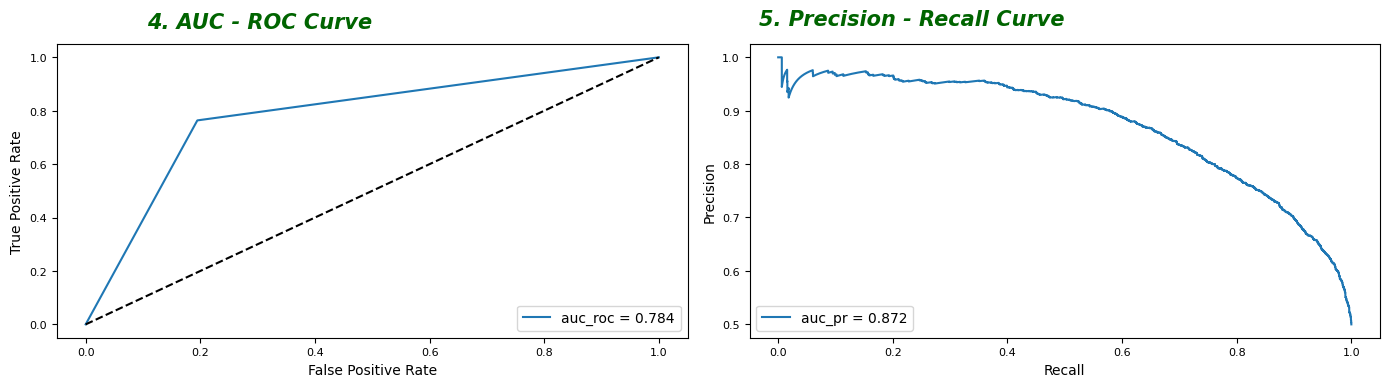

[[0.7797641688855078,
  0.5694933177081833,
  0.7964257964257965,
  0.763785394932936,
  0.7845180498697432,
  0.7844949279497394,
  0.8722835254088496]]

In [153]:
Generate_Model_Test_Classification_Report(pModel, x_test_lasso, y_test_lasso, 'Perceptron (Lasso)')

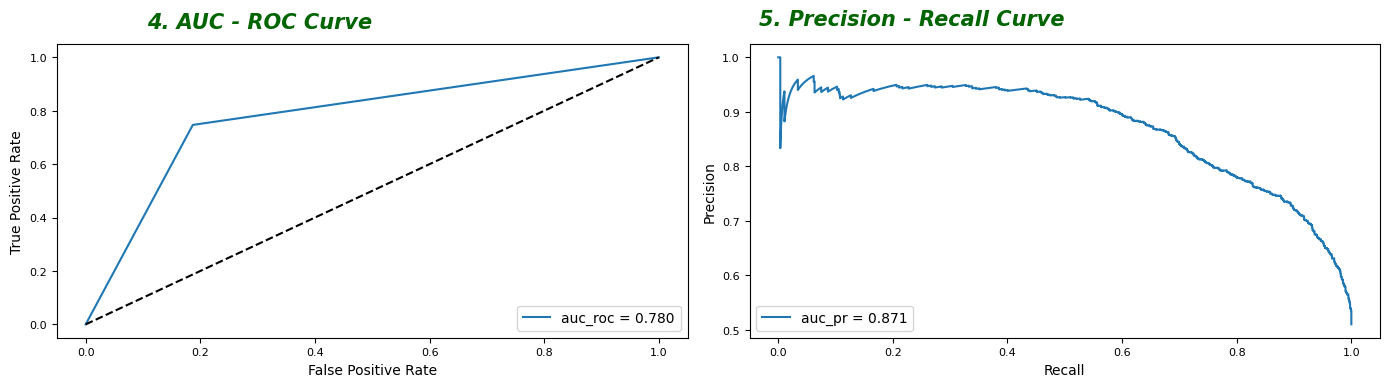

[[0.775463839454752,
  0.5606923528354846,
  0.8062992125984252,
  0.7469000729394603,
  0.7793077781912914,
  0.779984990877025,
  0.8708315047518425]]

In [154]:
Generate_Model_Test_Classification_Report(pModel, x_val_lasso, y_val_lasso, 'Perceptron Validation (Lasso)')

In [155]:

sgdModel=SGDClassifier(loss='log_loss')
sgdModel=sgdModel.fit(x_train_lasso, y_train_lasso)
sgdResults=sgdModel.predict(x_test_lasso)

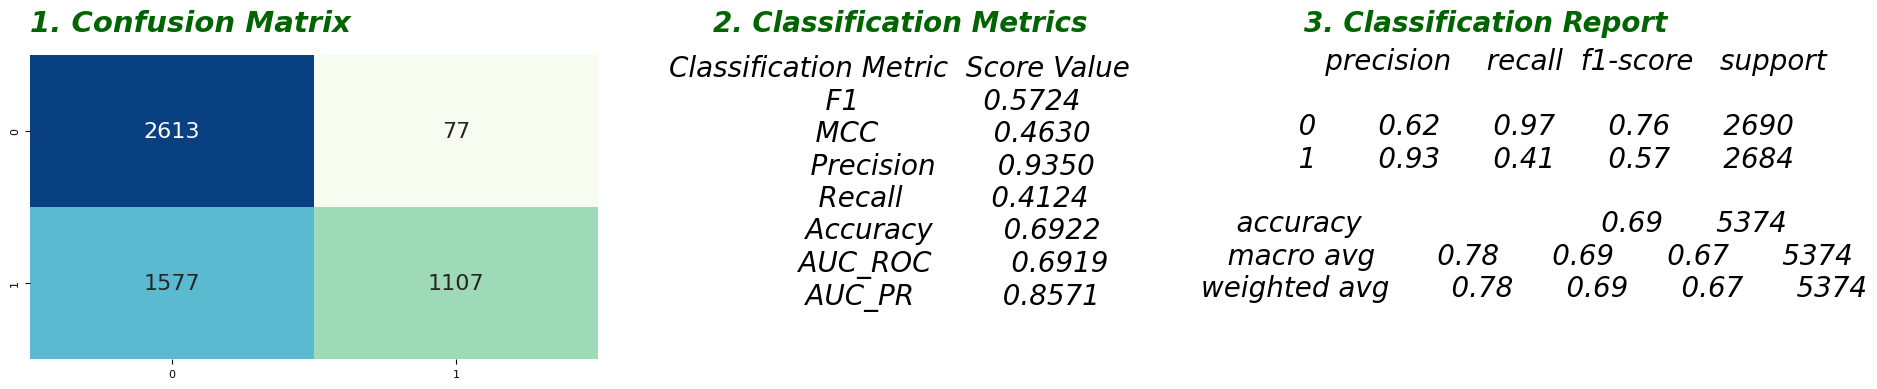

[[0.5723888314374354,
  0.4630326936570276,
  0.9349662162162162,
  0.4124441132637854,
  0.692221808708597,
  0.6919097889739001,
  0.857051127120072]]

In [156]:
Generate_Model_Test_Classification_Report(sgdModel, x_test_lasso, y_test_lasso, 'SGD (Lasso)')

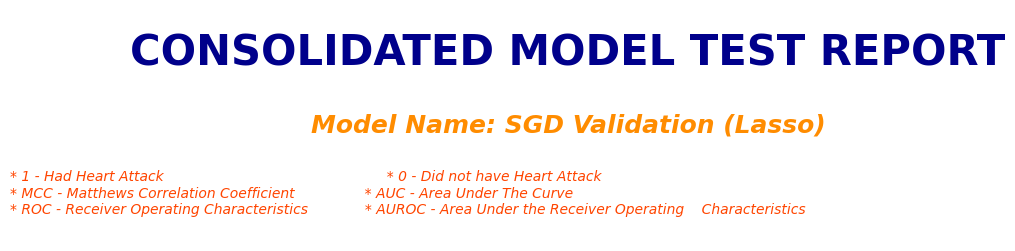

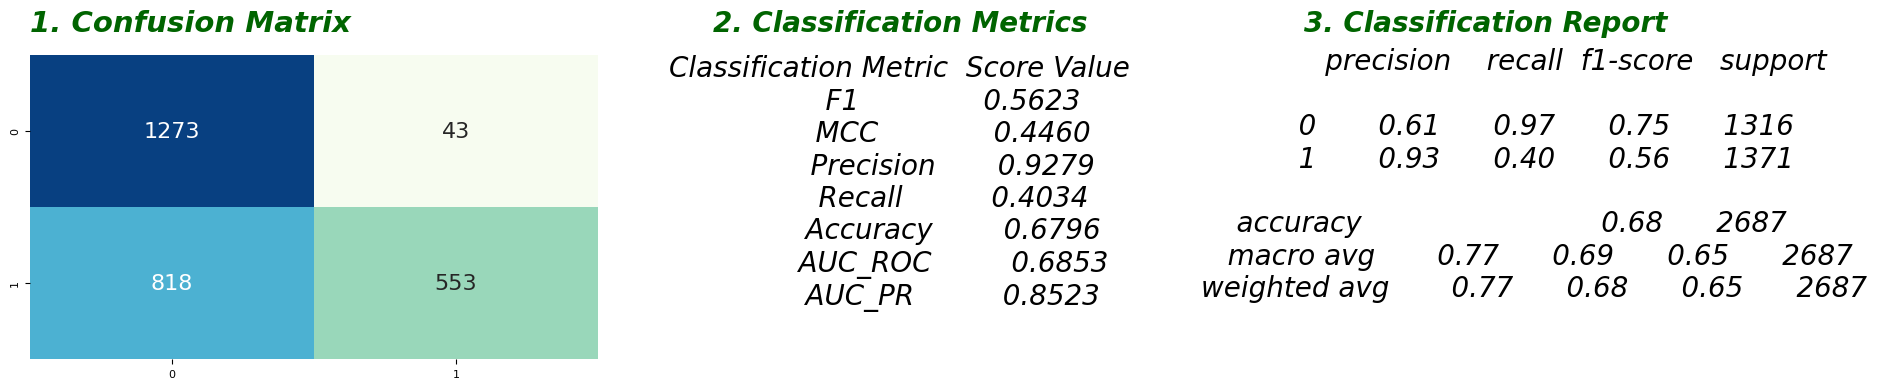

[[0.5622775800711745,
  0.44601164638924,
  0.9278523489932886,
  0.4033552151714077,
  0.6795682917752139,
  0.6853402215674668,
  0.8522729490423968]]

In [157]:
Generate_Model_Test_Classification_Report(sgdModel, x_val_lasso, y_val_lasso, 'SGD Validation (Lasso)')

In [158]:
lrModel=LogisticRegression(max_iter=300000)
lrModel=lrModel.fit(x_train_lasso, y_train_lasso)
lrResults=lrModel.predict(x_test_lasso)

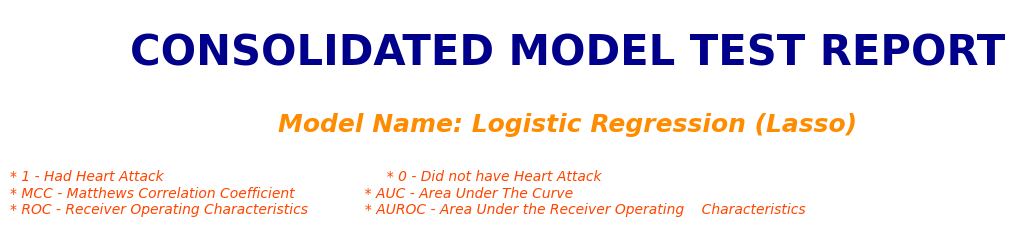

[[0.7924893534649633,
  0.6027139054278747,
  0.8247381144238517,
  0.7626676602086438,
  0.8005210271678452,
  0.8004788115169613,
  0.8865302874666844]]

In [159]:
Generate_Model_Test_Classification_Report(lrModel, x_test_lasso, y_test_lasso, 'Logistic Regression (Lasso)')

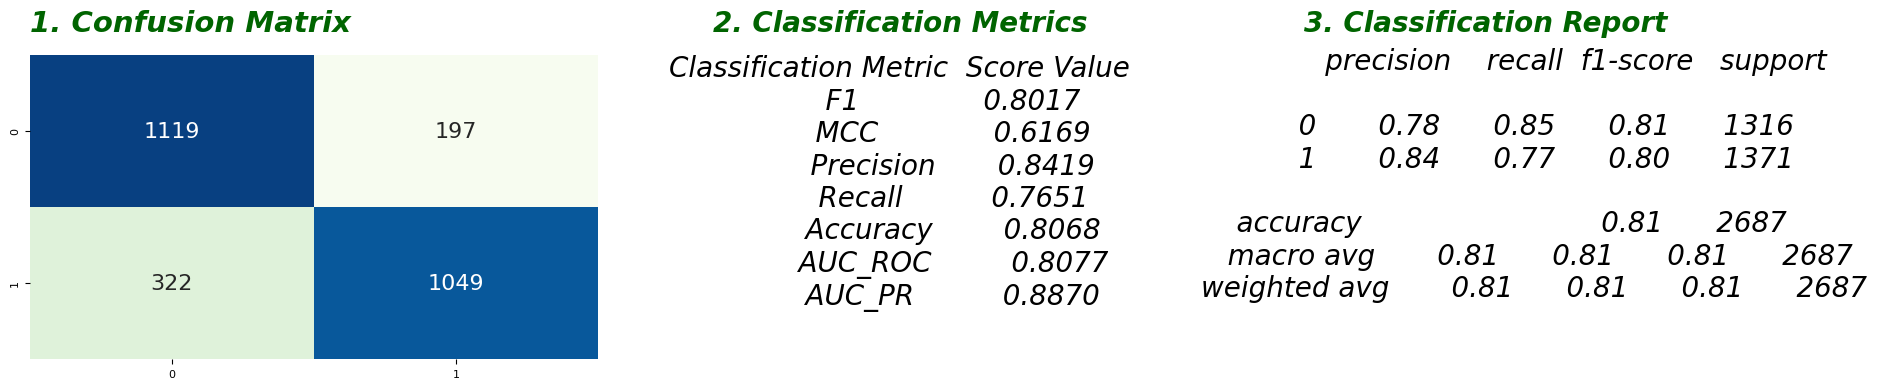

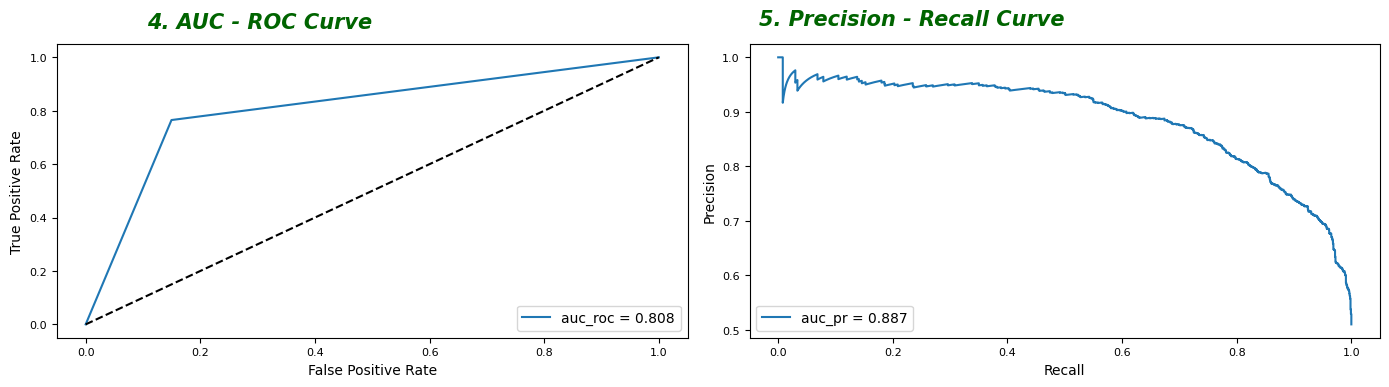

[[0.8016813144822316,
  0.6169366858951809,
  0.8418940609951846,
  0.7651349380014588,
  0.8068477856345366,
  0.80771944468462,
  0.8870316183316324]]

In [160]:
Generate_Model_Test_Classification_Report(lrModel, x_val_lasso, y_val_lasso, 'Logistic Regresson Validation (Lasso)')

In [161]:
from sklearn.svm import LinearSVC

svmModel=CalibratedClassifierCV(LinearSVC(max_iter=50000))
svmModel=svmModel.fit(x_train_lasso, y_train_lasso)
svmResults=svmModel.predict(x_test_lasso)

c:\Users\alexg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\alexg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\alexg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\alexg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\alexg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

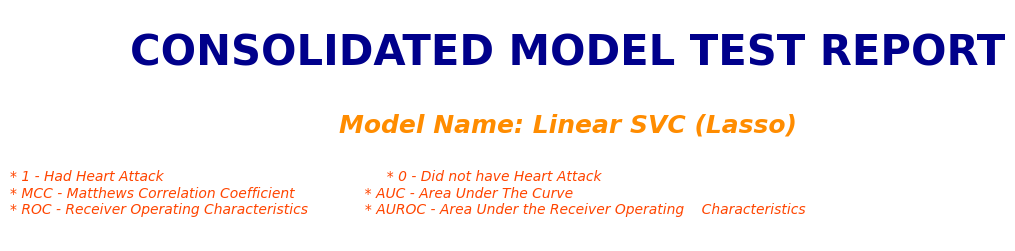

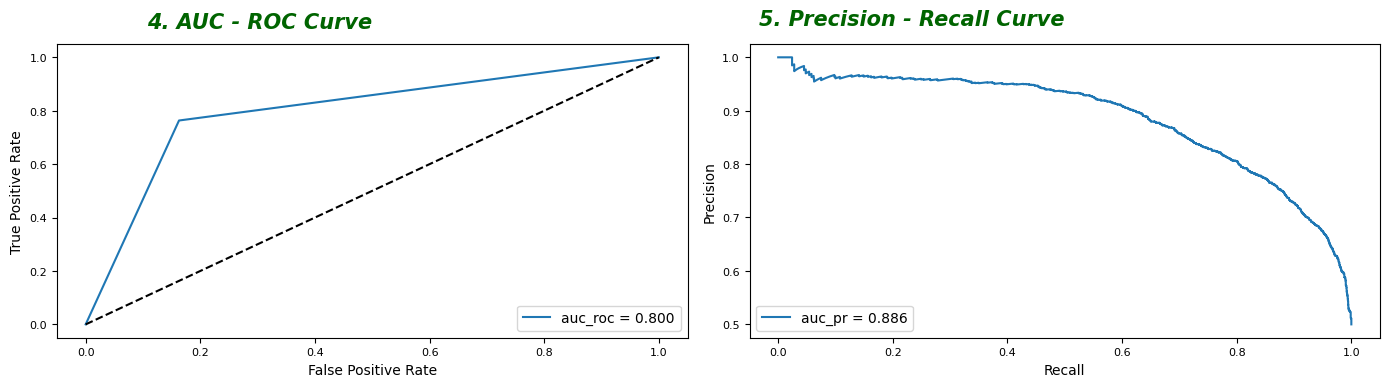

[[0.7924966157416361,
  0.6022577919613945,
  0.8238841978287093,
  0.7634128166915052,
  0.8003349460364719,
  0.8002937689405482,
  0.8861199710128215]]

In [162]:
Generate_Model_Test_Classification_Report(svmModel, X_test=x_test_lasso, y_test=y_test_lasso, model_name='Linear SVC (Lasso)')

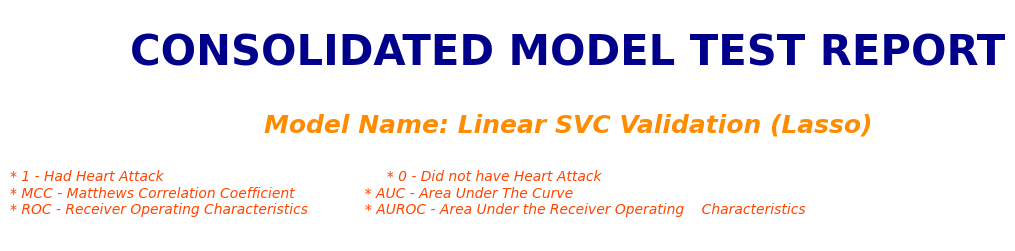

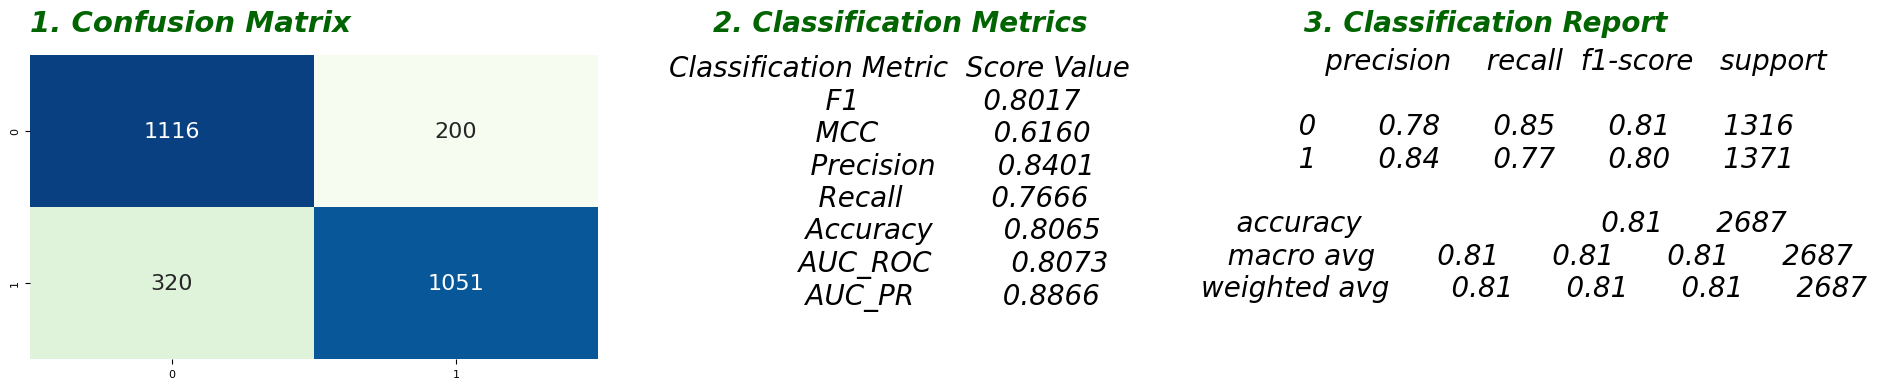

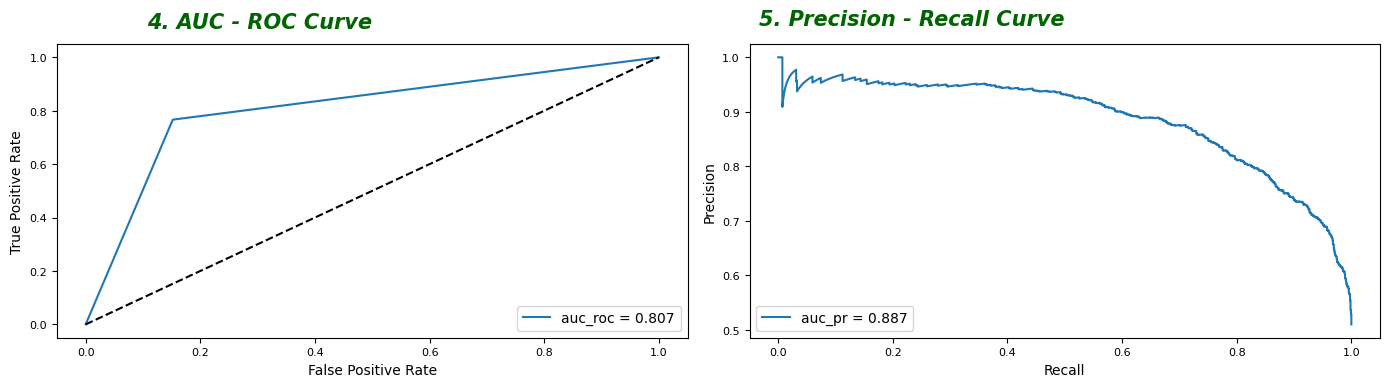

[[0.8016781083142639,
  0.6159509124463257,
  0.8401278976818545,
  0.7665937272064187,
  0.8064756233717901,
  0.8073090216579206,
  0.8865743764531584]]

In [163]:
Generate_Model_Test_Classification_Report(svmModel, x_val_lasso, y_val_lasso, 'Linear SVC Validation (Lasso)')